

#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Predicting a restaurant’s Zomato score using polarity of reviews(Sentiment Analysis).`

#### Group:
- Dinis Fernandes #20221848
- Dinis Gaspar #20221869
- Inês Santos #20221916
- Luis Davila #20221949
- Sara Ferrer #20221947




#### <font color='#BFD72F'>Table of Contents</font> <a class="anchor" id='toc'></a>

- [0. Literature Review](#0-literature-review)
- [1. Imports](#1-imports)
- [2. The Data](#2-the-data)
- [3. Explanatory Data Analysis (EDA)](#3-explanatory-data-analysis-eda)
- [4. Visualizations](#4-visualizations)
    - [4.1. Initial Visualizations](#41-initial-visualizations)
    - [4.2. Wordclouds](#42-wordclouds)
        - [4.2.1. Including Stopwords](#421-including-stopwords)
        - [4.2.2. Excluding Stopwords](#422-excluding-stopwords)
- [5. Sentiment Analysis Models](#5-sentiment-analysis-models)
    - [5.1. Vader](#51-vader)
    - [5.2. TextBlob](#52-textblob)
    - [5.3. Comparing Vader and TextBlob](#53-comparing-vader-and-textblob)
    - [5.4. Pre Trained Models](#54-pre-trained-models)
        - [5.4.1. RoBERTa](#541-roberta)
        - [5.4.2. DistilBERT](#542-distilbert)
        - [5.4.3. Comparing DistilBERT with RoBERTa](#543-comparing-distilbert-with-roberta)
- [6. Analyzing Outliers](#6-analyzing-outliers)
    - [6.1. Low Scores, High Rating](#61-low-scores-high-rating)
        - [6.1.1. Wordclouds](#611-wordclouds)
        - [6.1.2. Most Frequent Words](#612-most-frequent-words)
        - [6.1.3. Checking invalid words](#613-checking-invalid-words)
    - [6.2. High Scores, Low Rating](#62-high-scores-low-rating)
        - [6.2.1. Wordclouds](#621-wordclouds)
        - [6.2.2. Most Frequent Words](#622-most-frequent-words)
        - [6.2.3. Checking invalid words](#623-checking-invalid-words)
- [7. Final Analysis](#7-final-analysis)
    - [7.1. Final Model Analysis DistilBert](#71-final-model-analysis-distilbert)
- [8. References](#8-references)




## 0. Literature Review



[1] F. J. V. F. Monteiro, Predicting Restaurant Inspection Scores Based on Yelp Data and Sanitary Inspection Reports, M.S. thesis, Telecommunications and Computer Engineering, Instituto Superior Técnico, Universidade de Lisboa, Lisbon, Portugal, supervised by B. E. G. Martins and M. J. C. G. da Silva, Nov. 2018 https://fenix.tecnico.ulisboa.pt/downloadFile/563345090416349/76365_Predicting_Retaurant_Inspection_Scores_Based_on_Yelp_Data_and_Sanitary_Inpsection_Reports.pdf.


[2] Guda, Bhanu Prakash Reddy & Srivastava, Mashrin & Karkhanis, Deep. (2022). Sentiment Analysis: Predicting Yelp Scores. 10.48550/arXiv.2201.07999. https://www.researchgate.net/publication/357987621_Sentiment_Analysis_Predicting_Yelp_Scores.


[3] Liao, W., Zeng, B., Yin, X. et al. An improved aspect-category sentiment analysis model for text sentiment analysis based on RoBERTa. Appl Intell 51, 3522–3533 (2021). https://doi.org/10.1007/s10489-020-01964-1.


[4] A. Joshy and S. Sundar, "Analyzing the Performance of Sentiment Analysis using BERT, DistilBERT, and RoBERTa," 2022 IEEE International Power and Renewable Energy Conference (IPRECON), Kollam, India, 2022, pp. 1-6, doi: 10.1109/IPRECON55716.2022.10059542.

## 1. Imports

[Back to TOC](#toc)

In [1]:
import re
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


import pickle


from wordcloud import WordCloud


from utils import pipeline_v2
from sklearn.model_selection import ParameterGrid

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.tokenize import PunktSentenceTokenizer
sent_tokenizer=PunktSentenceTokenizer()
from nltk.corpus import webtext
nltk.download('webtext')
from nltk.corpus import brown
nltk.download('brown')



from textblob import TextBlob

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from tqdm.auto import tqdm


import os

pd.set_option('max_colwidth', 80)

c:\Users\saral\anaconda3\envs\text-mining1\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saral\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\saral\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\saral\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


## 2. The Data
  
[Back to TOC](#toc)



In [31]:
reviews = pd.read_csv("data/10k_reviews.csv").rename({'Review':'raw_review'}, axis=1)
reviews.drop(columns = ["Reviewer", "Metadata", "Time", "Pictures"], axis = 1, inplace=True)

reviews

,Restaurant,raw_review,Rating
0,Beyond Flavours,"The ambience was good, food was quite good . had Saturday lunch , which was ...",5
1,Beyond Flavours,Ambience is too good for a pleasant evening. Service is very prompt. Food is...,5
2,Beyond Flavours,A must try.. great food great ambience. Thnx for the service by Pradeep and ...,5
3,Beyond Flavours,Soumen das and Arun was a great guy. Only because of their behavior and sinc...,5
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are g...,5
...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice courteous servers and staff. Exce...,3
9996,Chinese Pavilion,"This place has never disappointed us.. The food, the courteous staff, the se...",4.5
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone found in Veg food"" and is not ...",1.5
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had been here couple of times wit...,4


In [32]:
reviews_copy = reviews.copy()


## 3. Explanatory Data Analysis (EDA)
[Back to TOC](#toc)

In [33]:
reviews_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   raw_review  9955 non-null   object
 2   Rating      9962 non-null   object
dtypes: object(3)
memory usage: 234.5+ KB


Created 3 new variables with information on the structure of each review.

In [34]:
reviews_copy["review_len"] = reviews_copy["raw_review"].map(lambda content : len(str(content)))
reviews_copy["sents"] = reviews_copy["raw_review"].map(lambda content :\
                                                                  sent_tokenizer.tokenize(str(content)))
reviews_copy["nr_sents"] = reviews_copy["sents"].map(lambda content: len(content))

We noticed that the data type associted to the variable Rating is object, which is strange, so we are checking its unique values to try and understand why is it like this.

In [35]:
reviews_copy["Rating"].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

Counting how many times "Like" appears in Ratings.

In [36]:
reviews_copy[reviews_copy["Rating"]=="Like"].count()

Restaurant    1
raw_review    1
Rating        1
review_len    1
sents         1
nr_sents      1
dtype: int64

We are using the reviews to predict the rating, so it does not make sense to keep those 55 reviews without an actual review, therefore we will remove them.

In [37]:
reviews_copy.dropna(inplace=True)

We will also remove the observation that has "Like" as a rating and now we can have Rating as a float, as it was expected.

In [41]:
condition = (reviews_copy["Rating"] == "Like")

reviews_copy = reviews_copy[~condition]
reviews_copy.reset_index(drop=True, inplace=True)
reviews_copy["Rating"] = reviews_copy["Rating"].astype("float32")
reviews_copy

,Restaurant,raw_review,Rating,review_len,sents,nr_sents
0,Beyond Flavours,"The ambience was good, food was quite good . had Saturday lunch , which was ...",5.0,224,"[The ambience was good, food was quite good ., had Saturday lunch , which wa...",5
1,Beyond Flavours,Ambience is too good for a pleasant evening. Service is very prompt. Food is...,5.0,144,"[Ambience is too good for a pleasant evening., Service is very prompt., Food...",5
2,Beyond Flavours,A must try.. great food great ambience. Thnx for the service by Pradeep and ...,5.0,189,"[A must try.. great food great ambience., Thnx for the service by Pradeep an...",3
3,Beyond Flavours,Soumen das and Arun was a great guy. Only because of their behavior and sinc...,5.0,148,"[Soumen das and Arun was a great guy., Only because of their behavior and si...",2
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are g...,5.0,160,"[Food is good.we ordered Kodi drumsticks and basket mutton biryani., All are...",6
...,...,...,...,...,...,...
9949,Chinese Pavilion,Madhumathi Mahajan Well to start with nice courteous servers and staff. Exce...,3.0,1030,"[Madhumathi Mahajan Well to start with nice courteous servers and staff., Ex...",13
9950,Chinese Pavilion,"This place has never disappointed us.. The food, the courteous staff, the se...",4.5,320,"[This place has never disappointed us.. The food, the courteous staff, the s...",3
9951,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone found in Veg food"" and is not ...",1.5,1574,"[Bad rating is mainly because of ""Chicken Bone found in Veg food"" and is not...",10
9952,Chinese Pavilion,I personally love and prefer Chinese Food. Had been here couple of times wit...,4.0,517,"[I personally love and prefer Chinese Food., Had been here couple of times w...",7


In [42]:
reviews_copy["Rating"].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5], dtype=float32)

c:\Users\saral\anaconda3\envs\text-mining1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Count'>

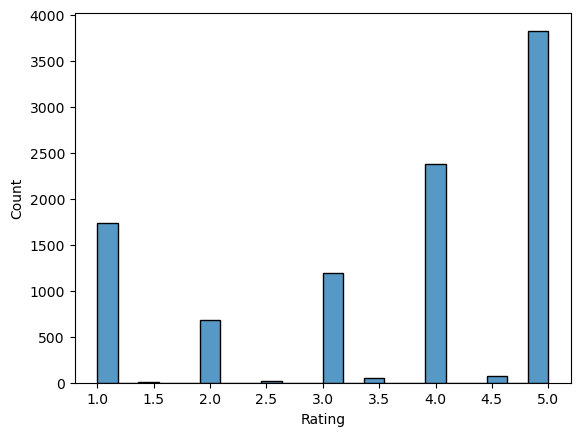

In [43]:
sns.histplot(reviews_copy["Rating"])

We can see that the very large majority of ratings are integer values but we won't perform any changes because we would be losing details and not ganing much with it.

In [46]:
Example = reviews_copy["raw_review"].sample(1).values[0]
Example

'Nice place...food was good.. we had sambar rice which was yummy, Guti vankaya pulav was avg...we had Gadwal pulav which was decent and other starters was also pretty decent...but some items which are mentioned in the starter menu(like Mirchi bajji) are always not available...management should be looking in to this....'

## 4. Visualizations

[Back to TOC](#toc)

### 4.1. Initial Visualizations

For our initial visualizations, we will generate a wordcloud without any pre-processing as we are yet only exploring.

In [47]:
preprocessor = pipeline_v2.MainPipeline(no_stopwords=False, no_punctuation=True)
reviews_copy['preproc_review'] = reviews_copy['raw_review'].map(lambda content : preprocessor.main_pipeline(content))
reviews_copy['preproc_review']

0       the ambience wa good food wa quite good had saturday lunch which wa cost eff...
1       ambience is too good for a pleasant evening service is very prompt food is g...
2       a must try great food great ambience thnx for the service by pradeep and sub...
3       soumen da and arun wa a great guy only because of their behavior and sincere...
4       food is ordered kodi drumstick and basket mutton biryani all are good thanks...
                                             ...                                       
9949    madhumathi mahajan well to start with nice courteous server and staff excell...
9950    this place ha never disappointed u the food the courteous staff the serene a...
9951    bad rating is mainly because of chicken bone found in veg food and is not ac...
9952    i personally love and prefer chinese food had been here couple of time with ...
9953    checked in here to try some delicious chinese food here seen non-veg luncheo...
Name: preproc_review, Length: 99

In [48]:
unigram_bow_vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r"(?u)\b\w+\b")
wc = WordCloud(background_color="white",max_words=100, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))

# Create the unigram
reviews_copy_vectorizer_matrix = unigram_bow_vectorizer.fit_transform(reviews_copy["preproc_review"]).toarray()

reviews_copy["initial_bow_vector"] = reviews_copy_vectorizer_matrix.tolist()

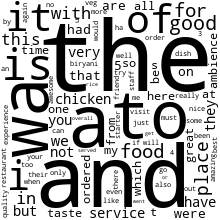

In [49]:
reviews_copy_list = unigram_bow_vectorizer.get_feature_names_out()

# Sum count of each bigram
word_count = np.sum(reviews_copy_vectorizer_matrix, axis=0).tolist()
reviews_dict = dict(zip(reviews_copy_list, word_count))

# Generating the world cloud
wc.generate_from_frequencies(reviews_dict)
wc.to_image()

We will also create a bar plot for the 30 most frequent words.

In [17]:
# Sorting the dictionary by values
sorted_dict = dict(sorted(reviews_dict.items(), key=lambda item: item[1], reverse=True))

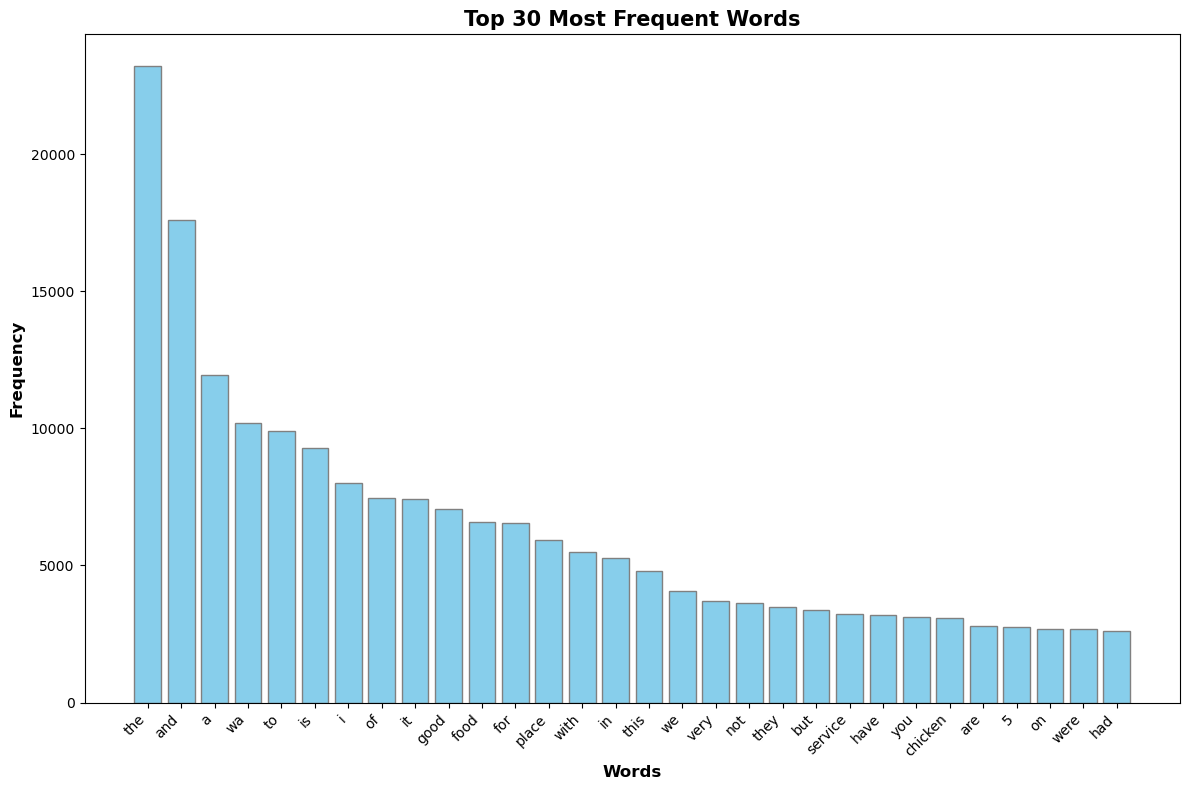

In [18]:
top_words = dict(list(sorted_dict.items())[:30])

plt.figure(figsize=(12, 8))
bars = plt.bar(top_words.keys(), top_words.values(), color='skyblue', edgecolor='gray')

# Adding style elements
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Frequent Words', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()


From this initial visualizations, we can see that the most frequent words are stopwords followed by words like 'good', 'food' and 'place'.

We will repeat this for bigrams, because "good" appears a lot of times but it can be "not good" or "sufficiently good" which it does not specifly mean in a positive manner.

In [50]:
bigram_bow_vectorizer = CountVectorizer(ngram_range=(2,2), token_pattern=r"(?u)\b\w+\b")
wc = WordCloud(background_color="white",max_words=75, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))

# Create the bigram
reviews_copy_vectorizer_matrix= bigram_bow_vectorizer.fit_transform(reviews_copy["preproc_review"]).toarray()

reviews_copy["bigram_bow_vector"] = reviews_copy_vectorizer_matrix.tolist()

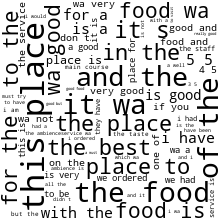

In [51]:
reviews_copy_list = bigram_bow_vectorizer.get_feature_names_out()

# Sum count of each bigram
word_count = np.sum(reviews_copy_vectorizer_matrix, axis=0).tolist()
reviews_dict = dict(zip(reviews_copy_list, word_count))

# Generating the world cloud
wc.generate_from_frequencies(reviews_dict)
wc.to_image()

In [21]:
# Sorting the dictionary by values
sorted_dict = dict(sorted(reviews_dict.items(), key=lambda item: item[1], reverse=True))

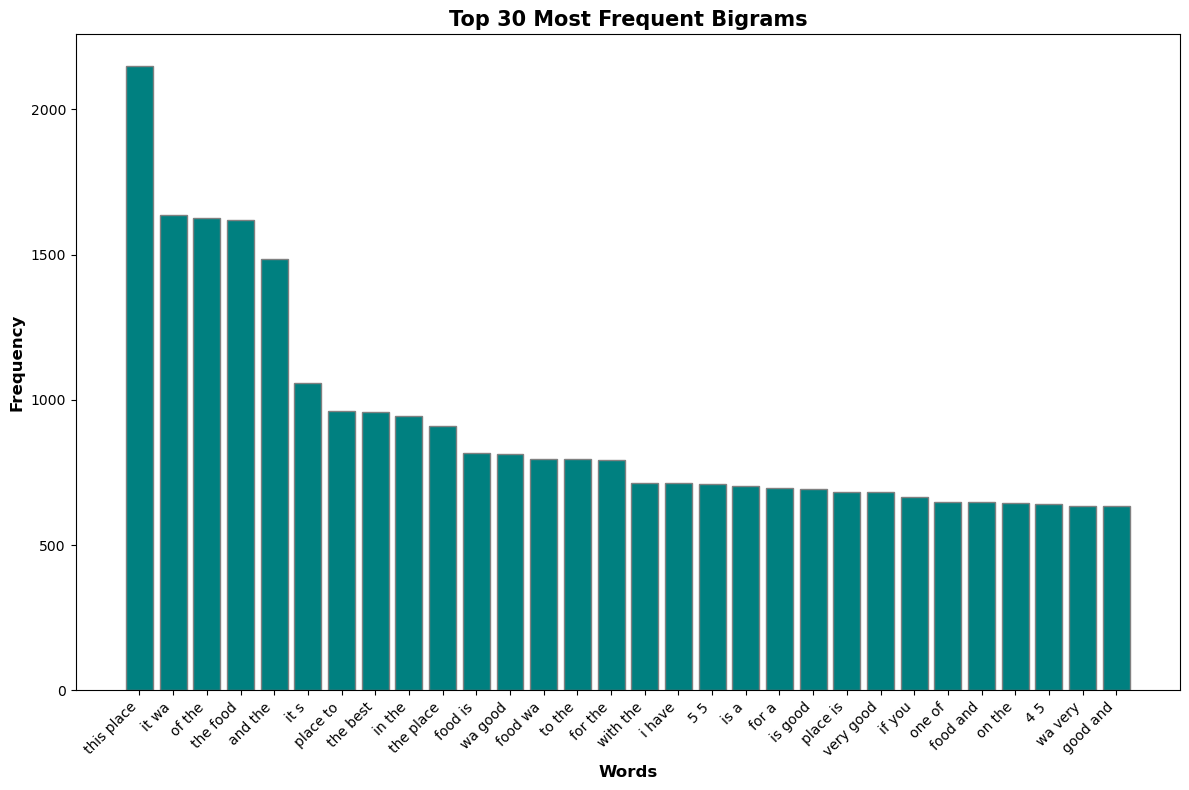

In [22]:
top_words = dict(list(sorted_dict.items())[:30])

plt.figure(figsize=(12, 8))
bars = plt.bar(top_words.keys(), top_words.values(), color='teal', edgecolor='gray')

# Adding style elements
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Frequent Bigrams', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

Using bigrams helped us to better understand which expressions are more frequent in reviews, even with stopwords included.

### 4.2. Wordclouds

We will create wordclouds by rating to check if the most common terms in reviews of different ratings yield any interesting insights. We will only create 5 wordclouds, because ratings will be rounded up, reviews with rating 1.5 will count as reviews with rating 2, for example.

#### 4.2.1. Including Stopwords

In [52]:
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), token_pattern=r"(?u)\b\w+\b")  
wc = WordCloud(background_color="white",max_words=120, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))

In [53]:
corpus = []
for rating in range(1,6):
    rating_doc = ""
    for review in reviews_copy["preproc_review"].loc[round(reviews_copy['Rating'])==rating]:        
        rating_doc = rating_doc + " " + review
    corpus.append(rating_doc)

In [25]:
folder_path = "word_clouds/ratings"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for idx, document in enumerate(corpus):
    rating_corpus_tfidf_td_matrix = bigram_tfidf_vectorizer.fit_transform(corpus)
    rating_corpus_tfidf_word_list = bigram_tfidf_vectorizer.get_feature_names_out()

    rating_tfidf_corpus_vocabulary = pipeline_v2.word_freq_calculator(rating_corpus_tfidf_td_matrix[idx].toarray(),\
                                                                        rating_corpus_tfidf_word_list, df_output=False)
    wc.generate_from_frequencies(rating_tfidf_corpus_vocabulary)
    wc.to_file(os.path.join(folder_path, "WC_Rating"+str(idx+1)+"_TFIDF.png"))

Although the wordclouds are stored in a folder, its analysis will be here:

Rating 1:

The top 5 words in reviews with rating 1 are: the, and, I, a, to.

The words ‘food’, ‘not’, ‘worst’, ‘bad’, ‘time’ and ‘service’ are still noticeable and show some negative opinions. The words ‘service’ and ‘ordered’ may show some concerns on the quality of customer service.

Rating 2:

The top 5 words in reviews with rating 2 are: the, and, a, wa, to.

The 5 most common words are the mostly same as in the previous rating. The words ‘service’, ‘food’, ‘taste’, ‘chicken’ and ‘not’ are still noticeable. The word ‘food’ is often associated with ‘taste’ and this may show some concerns on the food quality.

Rating 3:

The top 5 words in reviews with rating 3 are: the, and, a, to, wa.

The 5 most common words are the same as in the previous rating. The words ‘service’, ‘ambiance’, ‘food’, ‘taste’, ‘chicken’, ‘not’, ‘good’ and ‘great’ are still noticeable. The presence of the words ‘not’, ‘good’, ‘great’ and the conjunction ‘but’ may show some mixed feelings related to the ‘food’, ‘service’ and ‘ambiance’.

Rating 4:

The top 5 words in reviews with rating 4 are: the, and, a, wa, is.

The top 5 words are still very similar to the previous ratings. The words ‘good’, ‘place’, ‘chicken’, ‘food’, ‘best’ and ‘taste’ are still. The high frequence of appearance of the previous mentioned words may result from customers satisfaction with the food and the place.

Rating 5:

The top 5 words in reviews with rating 5 are: the, and, a, to, is.

The top 5 words in reviews with rating 5 are still a bit like the top words in previous ratings. The words ‘food’, ‘good’, ‘place’, ‘awesome’, ‘amazingreally’, ‘ambiencenice’, ‘awesome’, ‘service’, ‘great’ and ‘chicken’ are very noticeable. It is possible to see the predominance of positive adjectives in this rating, which means that customers are very satisfied, mainly with the food, ambience and the service.

#### 4.2.2. Excluding Stopwords

We will now check these wordclouds but removing stopwords, except for 'no' and 'not', as they can actually have value in the context of sentiment analysis.

In [55]:
preprocessor = pipeline_v2.MainPipeline(no_punctuation=True, ignored_stopwords=['no', 'not'])
reviews_copy['preproc_review_no_sw'] = reviews_copy['raw_review'].map(lambda content : preprocessor.main_pipeline(content))
reviews_copy['preproc_review_no_sw']

0       ambience good food quite good saturday lunch cost effective good place sate ...
1       ambience good pleasant evening service prompt food good good experience soum...
2       must try great food great ambience thnx service pradeep subroto personal rec...
3       soumen da arun great guy behavior sincerety good food course would like visi...
4       food ordered kodi drumstick basket mutton biryani good thanks pradeep served...
                                             ...                                       
9949    madhumathi mahajan well start nice courteous server staff excellent serving ...
9950    place never disappointed u food courteous staff serene ambience wanted somet...
9951    bad rating mainly chicken bone found veg food not acceptable vegetarian sati...
9952    personally love prefer chinese food couple time husband ambiance place good ...
9953    checked try delicious chinese food seen non-veg luncheon tray menu an tried ...
Name: preproc_review_no_sw, Leng

In [56]:
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), token_pattern=r"(?u)\b\w+\b")  
wc = WordCloud(background_color="white",max_words=120, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))

In [57]:
no_sw_corpus = []
for rating in range(1,6):
    rating_doc = ""
    for review in reviews_copy["preproc_review_no_sw"].loc[round(reviews_copy['Rating'])==rating]:        
        rating_doc = rating_doc + " " + review
    no_sw_corpus.append(rating_doc)

In [29]:
folder_path = "word_clouds/ratings"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for idx, document in enumerate(no_sw_corpus):
    rating_corpus_tfidf_td_matrix = bigram_tfidf_vectorizer.fit_transform(no_sw_corpus)
    rating_corpus_tfidf_word_list = bigram_tfidf_vectorizer.get_feature_names_out()

    rating_tfidf_corpus_vocabulary = pipeline_v2.word_freq_calculator(rating_corpus_tfidf_td_matrix[idx].toarray(),\
                                                                        rating_corpus_tfidf_word_list, df_output=False)
    wc.generate_from_frequencies(rating_tfidf_corpus_vocabulary)
    wc.to_file(os.path.join(folder_path, "WC_Rating"+str(idx+1)+"_nostopwords_TFIDF.png"))

Although the wordclouds are stored in a folder, its analysis will be here:

Rating 1:

The top 5 words in reviews with rating 1 are: not, food, place, ordered, order.

Aside from the word ‘not’, the words ‘worst’, ‘bad’, ‘pathetic’ and ‘never’ also appear a lot in reviews with this rating which demonstrates customers dissatisfaction. The reason why ‘not’ and ‘good’ appear very frequently may be due to the usage of these words linked to another or to each other, to prove dissatisfaction, like: ‘not good’. The words ‘service’ and ‘served’ also appear which may show some concerns about customer service quality and the words ‘manager’ and ‘staff’ also appear which contributes to this point. Still regarding the quality of customer service, the words ‘time’ and ‘table’ may also contribute to these concerns and may suggest long waiting times for a table or the ordered food. The words ‘food’, ‘experience’, ‘quality’ and ‘money’ may express negative thoughts regarding the price – quality/price-experience/price-food relationship. There are a few dishes mentioned: ‘chicken’, ‘biryani’ and ‘veg’. The reason for being mentioned so frequently may be due to these dishes being most of the times poorly prepared or being popular, therefore even a small proportion of poorly prepared dishes may result in a higher number of negative complaints compared to less popular dishes.

Rating 2:

The top 5 words in reviews with rating 2 are: not, food, good, place, service.

The words mentioned in reviews with rating 2 are very similar to the ones used in reviews with rating 1. The adjectives, ‘average’, ‘better’, ‘disappointed’, ’overall’ and ‘ok’, still show some dissatisfaction but not as negative as the in the previous rating. The words ‘service’, ‘served’ and ‘staff’ may still show some concerns with the quality of customer service and the words ‘time’ and ‘table’, as in the previous rating, may show dissatisfaction with the waiting time for a table or food. The words that previous showed concerns with price – experience/price-food relationship are also present in this rating and, aside from these ones, it still has ‘ambience’, ‘quantity’ and ‘menu’ which may show negative opinions on the restaurants atmosphere, on the food quantity (therefore a bad price – quantity relationship) and an overall dissatisfaction with the menu. Aside from the dishes mentioned on the previous rating, there is another one, ‘pizza. ‘Pizza’ not being mentioned before may mean that this is also a popular dish and sometimes is poorly prepared but not as bad as the other ones. The words ‘starter’ and ‘spicy’ appears, which could mean that this type of dishes are the ones about which customers have the most negative opinions. The word ‘buffet’ also appears which may mean that when this aspect may provoke some negative opinions on customers.

Rating 3:

The top 5 words in reviews with rating 3 are: good, food, not, place, chicken.

The words that appear in reviews with rating 3 are still very similar to the two previous ratings. In these reviews, more positive adjectives begin to appear, such as: ‘good’, ‘average’, ‘better’, ‘great’, ‘ok’, ‘nice’, ‘overall’ and ’like’, which shows more satisfied customers. The words ‘service’ and ‘staff’ still appear, but with this rating they may either be referenced in a positive or in a negative way. The dishes that appeared in the previous ratings also appear in this one, which may be in accordance with the fact that these are very popular dishes and even a small proportion of these dishes prepared in a poorly manner may result in a higher number of negative complaints compared to less popular dishes. It is also possible to notice some numbers: ‘3’, ‘3.5’ and ’5’, being the last one the more frequent one, probably because clients are rating specific elements of the restaurant in the reviews and some stand out, therefore receiving a high rating while others not as much (3 and 3.5).

Rating 4:

The top 5 words in reviews with rating 4 are: place, good, food, chicken, 5.

The 5 more frequent words in this rating are still very similar to the last ones, the biggest difference is that ‘not’ is no longer a very frequent word and that we have a number in the most common words for this rating. The reviews with rating 4 show very satisfied customers because they are using words like: ‘good’, ‘nice’, ‘best’, ‘amazing’, ‘like’, ‘well’. The words ‘staff’, ‘service’ and ‘time’ still appear but in this case are probably associated to positive opinions. The same dishes as before are being mentioned, which contributes to what was said before. The words ‘taste’ and ‘try’ may suggest very well-prepared dishes. It is in this rating the first time that the word ‘friend’ appears which may suggest that clients recommend the restaurants to friends.

Rating 5:

The top 5 words in reviews with rating 5 are: good, food, place, service, great.

The top 3 words in reviews with rating 5 are mostly the same as in the previous rating. With this rating, words like: ‘good’, ‘great’, ‘awesome’, ‘love’, ‘nice’, ‘amazing’, ‘best’ and ‘delicious’ are very common and ‘not’ does not appear anymore, which shows very satisfied customers. The word ‘food’ is often associated with ‘best’ and ‘delicious’ which shows customers satisfaction with food, there is also an expression contributing to this point, ‘food good’ and ‘best chicken’. The same dishes as before appear, so what was mentioned in previous points is very probably true and these dishes are very popular among customers. The words ‘family’ and ‘friend’ and the expressions together with the word ‘recommend’ suggest that customers will be recommending the restaurant to others or that it is a great place to come with others. The word ‘friendly’ and the expression ‘good service’ are usually associated with ‘staff’ which show the positive opinion on the staff.

We will also check word frequency without stopwords (only including no and not).

In [16]:
unigram_bow_vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r"(?u)\b\w+\b")

# Create the unigram
reviews_copy_ns_vectorizer_matrix = unigram_bow_vectorizer.fit_transform(reviews_copy['preproc_review_no_sw']).toarray()
reviews_ns_copy_list = unigram_bow_vectorizer.get_feature_names_out()

# Sum count of each unigram
word_count_ns = np.sum(reviews_copy_ns_vectorizer_matrix, axis=0).tolist()
reviews_dict_ns = dict(zip(reviews_ns_copy_list, word_count_ns))

sorted_dict_ns = dict(sorted(reviews_dict_ns.items(), key=lambda item: item[1], reverse=True))
top_words_ns = dict(list(sorted_dict_ns.items())[:30])

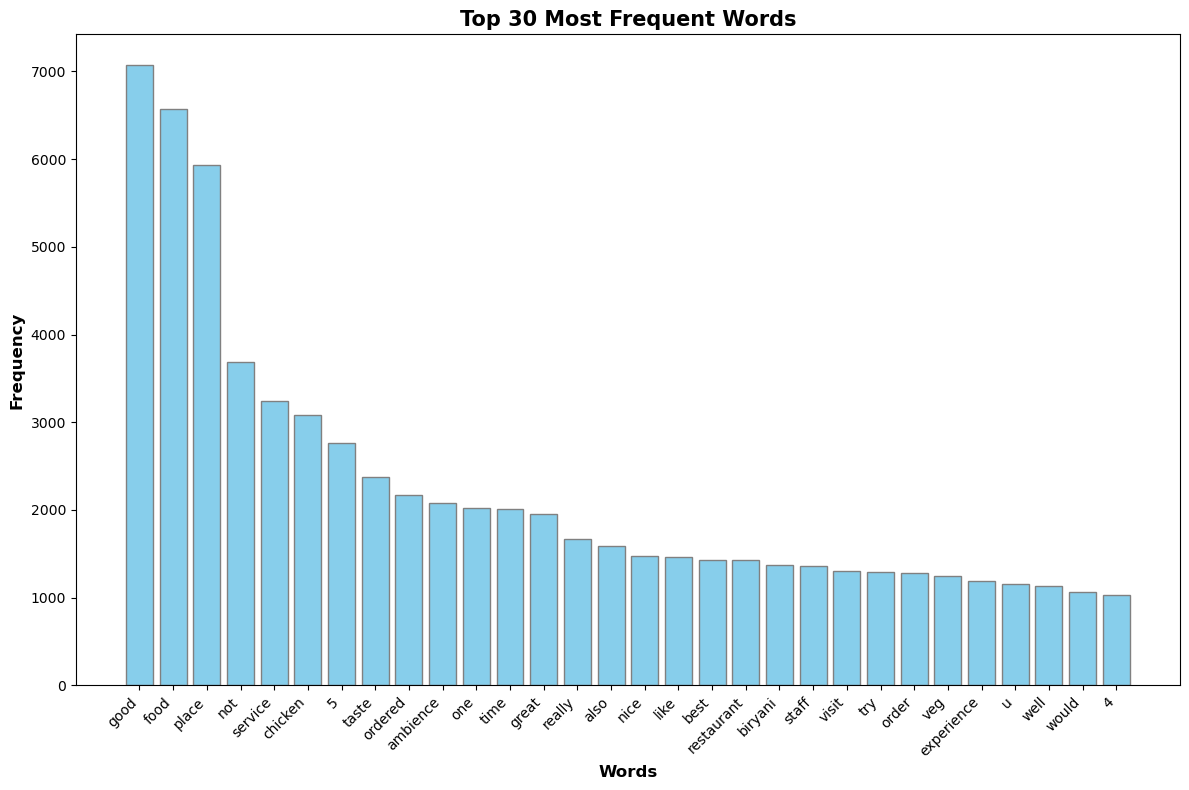

In [17]:

plt.figure(figsize=(12, 8))
bars = plt.bar(top_words_ns.keys(), top_words_ns.values(), color='skyblue', edgecolor='gray')

# Adding style elements
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Frequent Words', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

When comparing this graph with the one with stopwords, it is clear that this one provides more meaningful insights. The top 5 more frequent words in reviews are: good, food, place, not and service.

We will repeat the previous step for bigrams.

In [18]:
bigram_bow_vectorizer = CountVectorizer(ngram_range=(2,2), token_pattern=r"(?u)\b\w+\b")

# Create the bigram
reviews_copy_ns_vectorizer_matrix = bigram_bow_vectorizer.fit_transform(reviews_copy['preproc_review_no_sw']).toarray()
reviews_ns_copy_list = bigram_bow_vectorizer.get_feature_names_out()

# Sum count of each unigram
word_count_ns = np.sum(reviews_copy_ns_vectorizer_matrix, axis=0).tolist()
reviews_dict_ns = dict(zip(reviews_ns_copy_list, word_count_ns))

sorted_dict_ns = dict(sorted(reviews_dict_ns.items(), key=lambda item: item[1], reverse=True))
top_words_ns = dict(list(sorted_dict_ns.items())[:30])

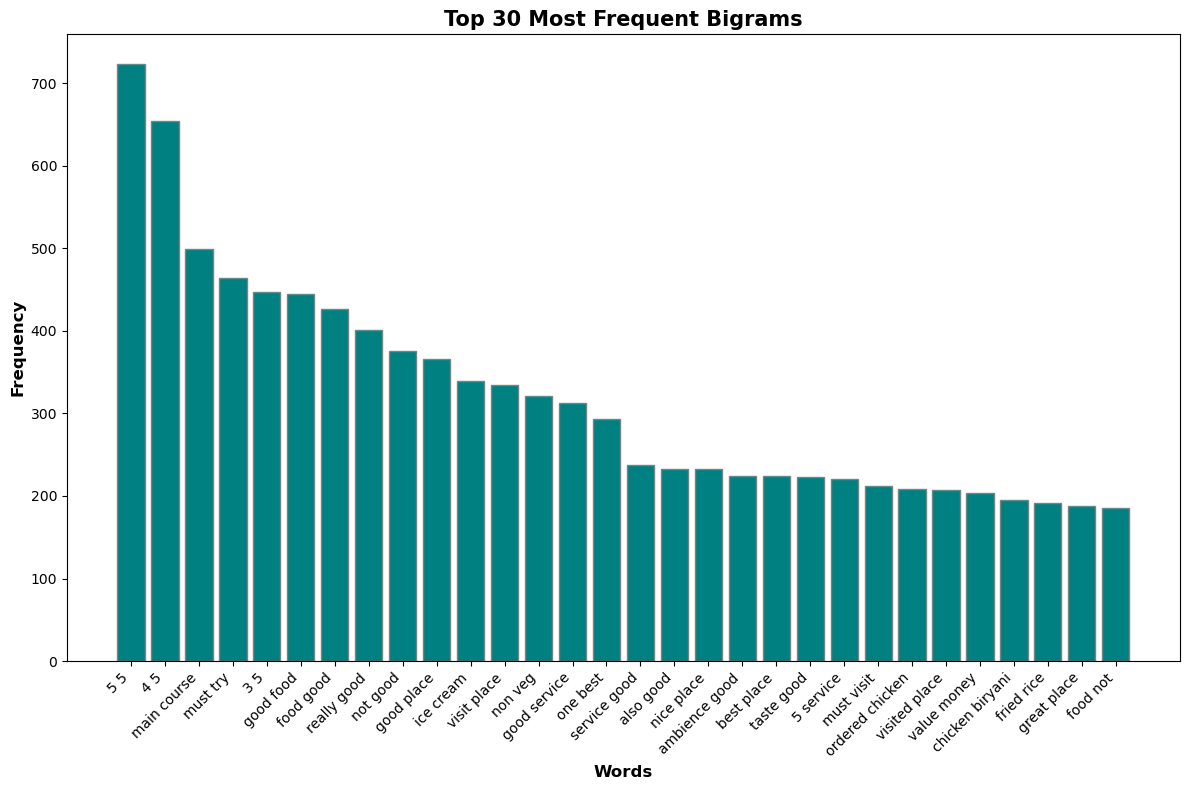

In [19]:
plt.figure(figsize=(12, 8))
bars = plt.bar(top_words_ns.keys(), top_words_ns.values(), color='teal', edgecolor='gray')

# Adding style elements
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Frequent Bigrams', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

When analysing the graph, we noticed some numbers ('5 5', '4 5') between the most frequent expressions. This may be due to customers writing in their reviews the rating to the restaurant or to diverse elements. The expressions that follow the numbers are 'main course' and 'must try' which shows that the main course is often mentioned in reviews, either a positive or negative manner, and 'must try' suggest satisfaction from the customers as they may be suggesting to other people to try that restaurant.

## 5. Sentiment Analysis Models

[Back to TOC](#toc)

### 5.1. Vader

To start our analysis with Vader, we tailored our data preprocessing pipeline to aligh with Vader requirements.

In [21]:
vader_preprocessor = pipeline_v2.MainPipeline(no_emojis = False, 
                                        no_hashtags = False,
                                        no_punctuation = False,
                                        no_stopwords= False,
                                        convert_diacritics = True,
                                        lowercase = False, 
                                        lemmatized = False)
reviews_copy['preproc_review_vader'] = reviews_copy['raw_review'].map(lambda content : vader_preprocessor.main_pipeline(content))
reviews_copy['preproc_review_vader']

0       The ambience was good, food was quite good . had Saturday lunch, which was c...
1       Ambience is too good for a pleasant evening . Service is very prompt . Food ...
2       A must try .. great food great ambience . Thnx for the service by Pradeep an...
3       Soumen das and Arun was a great guy . Only because of their behavior and sin...
4       Food is ordered Kodi drumsticks and basket mutton biryani . All are good . T...
                                             ...                                       
9949    Madhumathi Mahajan Well to start with nice courteous servers and staff . Exc...
9950    This place has never disappointed us .. The food, the courteous staff, the s...
9951    Bad rating is mainly because of "Chicken Bone found in Veg food" and is not ...
9952    I personally love and prefer Chinese Food . Had been here couple of times wi...
9953    Checked in here to try some delicious chinese food here, seen non-veg lunche...
Name: preproc_review_vader, Leng

We then applied SentimentIntensityAnalyzer() to every review in our data in order to get Vader polarity scores.

In [22]:
vader = SentimentIntensityAnalyzer()

reviews_copy['vader_scores'] = reviews_copy['preproc_review_vader'].apply(lambda review: vader.polarity_scores(review)["compound"])

In [23]:
reviews_copy.vader_scores.describe()

count    9954.000000
mean        0.475138
std         0.584942
min        -0.994200
25%         0.000000
50%         0.765000
75%         0.935600
max         0.999700
Name: vader_scores, dtype: float64

To help us to better understand our results, we plotted our results and checked the pearson and spearman correlations between the Ratings and the scores with achieved with Vader.

<Axes: xlabel='Rating', ylabel='vader_scores'>

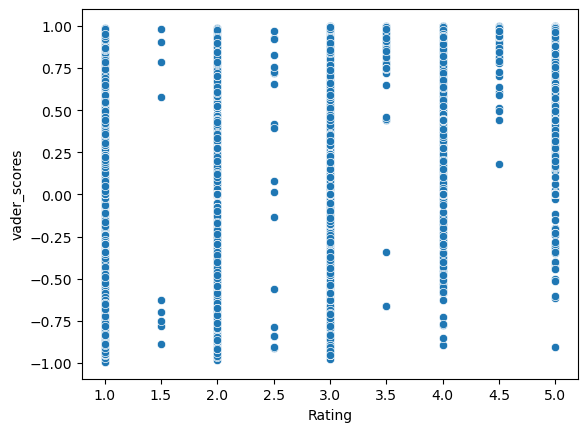

In [24]:
sns.scatterplot(reviews_copy, y='vader_scores', x='Rating')

From this visualization, that Vader scores are bit more accurate for higher ratings as we do not have any score of -1 for ratings between 4 and 5. For neutral ratings (2.5-3.5) it is showing a mix of positive and negative scores and for negative ratings (1-2) there is some spread which may mean that Vader is not capturing so well the negative sentiment.

In [25]:
pearson_r, p_value = pearsonr(reviews_copy["Rating"],reviews_copy["vader_scores"])
pearson_r

0.7057477927812915

A value of 0.70 in pearson correlation indicates a positive linear relationship, which means that when the ratings increase the Vader score should also increase. 

In [26]:
spearman_r, p_value = spearmanr(reviews_copy["Rating"],reviews_copy["vader_scores"])
spearman_r

0.574276144968674

A value of 0.57 in spearman correlation indicates a general positive trend although the relationship between the variables is not consistent for all values.

### 5.2. TextBlob

To start our analysis with TextBlob, we tailored our data preprocessing pipeline to aligh with TextBlob requirements, so we had to remove emojis and hastags.

In [27]:
vader_preprocessor = pipeline_v2.MainPipeline(no_emojis = True, 
                                        no_hashtags = True,
                                        hashtag_retain_words=True,
                                        no_punctuation = False,
                                        no_stopwords= False,
                                        convert_diacritics = True,
                                        lowercase = False, 
                                        lemmatized = False)
reviews_copy['preproc_review_textblob'] = reviews_copy['raw_review'].map(lambda content : vader_preprocessor.main_pipeline(content))
reviews_copy['preproc_review_textblob']

0       The ambience was good, food was quite good . had Saturday lunch, which was c...
1       Ambience is too good for a pleasant evening . Service is very prompt . Food ...
2       A must try .. great food great ambience . Thnx for the service by Pradeep an...
3       Soumen das and Arun was a great guy . Only because of their behavior and sin...
4       Food is ordered Kodi drumsticks and basket mutton biryani . All are good . T...
                                             ...                                       
9949    Madhumathi Mahajan Well to start with nice courteous servers and staff . Exc...
9950    This place has never disappointed us .. The food, the courteous staff, the s...
9951    Bad rating is mainly because of "Chicken Bone found in Veg food" and is not ...
9952    I personally love and prefer Chinese Food . Had been here couple of times wi...
9953    Checked in here to try some delicious chinese food here, seen non-veg lunche...
Name: preproc_review_textblob, L

For every review, we got a value for their polarity.

In [28]:
reviews_copy['textblob_scores'] = reviews_copy['preproc_review_textblob'].apply(lambda review: TextBlob(review).sentiment.polarity)

In [29]:
reviews_copy.textblob_scores.describe()

count    9.954000e+03
mean     2.491608e-01
std      3.644261e-01
min     -1.000000e+00
25%      5.551115e-17
50%      2.750000e-01
75%      5.033333e-01
max      1.000000e+00
Name: textblob_scores, dtype: float64

As before, we made a scatter plot with the model scores and the ratings and calculated pearson and spearman correlations to help in understanding the results.

<Axes: xlabel='Rating', ylabel='textblob_scores'>

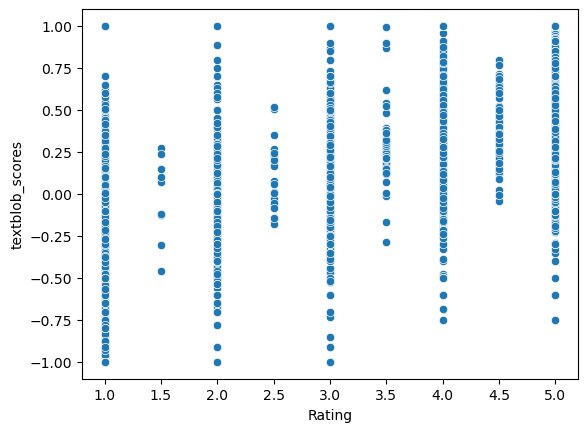

In [30]:
sns.scatterplot(reviews_copy, y='textblob_scores', x='Rating')

In this plot we can see that lower ratings are more associated to negative textBlob scores, although it also shows some spread, and higher ratings to positive scores. For neutral ratings (2.5-3.5) we can see a mix of positive and negative scores.

In [31]:
pearson_r, p_value = pearsonr(reviews_copy["Rating"],reviews_copy["textblob_scores"])
pearson_r

0.6947512062029135

A value of 0.69 in pearson correlation indicates a positive linear relationship, which means that when the ratings increase the TextBlob score should also increase. 

In [32]:
spearman_r, p_value = spearmanr(reviews_copy["Rating"],reviews_copy["textblob_scores"])
spearman_r

0.6767798152289851

A value of 0.67 in spearman correlation indicates a positive trend although the relationship between the variables is not consistent for all values, which we have already stated before.

### 5.3. Comparing Vader and TextBlob

To compare both models we generated a scatter plot and checked their pearson and spearman correlation.

<Axes: xlabel='vader_scores', ylabel='textblob_scores'>

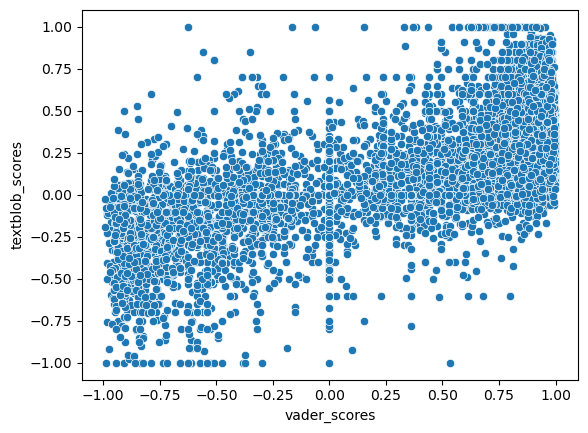

In [33]:
sns.scatterplot(reviews_copy, y='textblob_scores', x='vader_scores')

From the plot it is possible to more or less identify a positive correlation, meaning that when the vader score increase the TextBlob score also increases. It is also noticeable two clusters, one where both scores are positive and the other when both scores are negative. We can also see a transition area in the middle showing that both models identified neutral reviews.

In [34]:
pearson_r, p_value = pearsonr(reviews_copy["vader_scores"],reviews_copy["textblob_scores"])
pearson_r

0.658739406602486

A value of 0.65 in pearson correlation means a positive correlation, which is in accordance to what was said before.

In [35]:
spearman_r, p_value = spearmanr(reviews_copy["vader_scores"],reviews_copy["textblob_scores"])
spearman_r

0.5557703745143185

A value of 0.55 in spearman correlation means indicates a positive trend although the relationship between the variables is not consistent for all values, which is also noticeable in the plot.

### 5.4. Pre Trained Models

We will use two pre trained models : RoBERTa and DistilBERT, which are versions of the BERT architecture, fine tuned for sentiment analysis.

For both models we checked their descriptive statistics, their pearson and spearman correlations and we will generate a scatter plot with the ratings and the scores.


#### 5.4.1. RoBERTa

In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from tqdm.auto import tqdm
from scipy.special import softmax

tqdm.pandas()
MODEL_NAME = 'pachequinho/sentiment_roberta_restaurant_10'

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

def scores_berta(text):
    encoded_input = tokenizer(text, return_tensors='pt',   truncation=True, max_length=512)
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

reviews_copy[['roberta_negative', 'roberta_positive']] = reviews_copy['raw_review'].progress_apply(lambda review: scores_berta(review)).apply(pd.Series)


  0%|          | 0/9954 [00:00<?, ?it/s]

In [3]:
reviews_copy["roberta_positive"].describe()

count    9954.000000
mean        0.657428
std         0.459581
min         0.005803
25%         0.008763
50%         0.996100
75%         0.997706
max         0.998077
Name: roberta_positive, dtype: float64

From this statistics and as the model has 2 outputs that are complementary, with a median value of 0.996 we can conclude that this model is very good on predicting positive sentiment scores.

Checking pearson correlation between the ratings and RoBERTa's scores.

In [37]:
pearson_r, p_value = pearsonr(reviews_copy["roberta_positive"],reviews_copy["Rating"])
pearson_r

0.8270526244539879

A value of 0.827 in pearson correlation between the positive score of RoBERta and the rating is in accordance to what was said before, that this model performs very well when predicting positive sentiment scores.

In [38]:
pearson_r, p_value = pearsonr(reviews_copy["roberta_negative"],reviews_copy["Rating"])
pearson_r

-0.8270526243230338

Checking spearman correlation between the ratings and RoBERTa's scores.

In [39]:
spearman_r, p_value = spearmanr(reviews_copy["roberta_positive"],reviews_copy["Rating"])
spearman_r

0.7621139483753588

A value of 0.76 in spearman correlation also show the positive relationship between the positive score and the ratings.

In [40]:
spearman_r, p_value = spearmanr(reviews_copy["roberta_negative"],reviews_copy["Rating"])
spearman_r

-0.7621131742178244

<Axes: xlabel='Rating', ylabel='roberta_positive'>

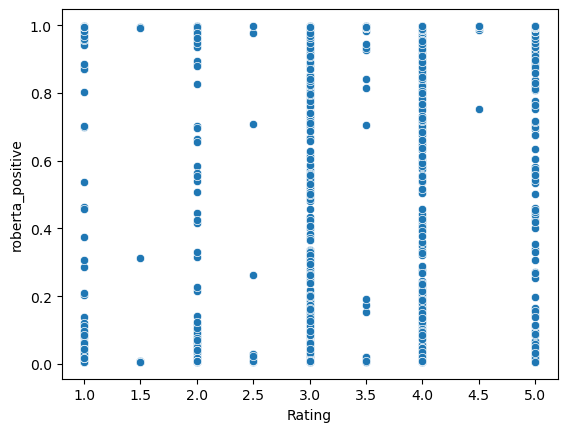

In [41]:
sns.scatterplot(reviews_copy, y='roberta_positive', x='Rating')

From this plot, we can conclude that higher ratings have a higher score and lower ratings have a lower score, although there are some outliers. The more neutral ratings, show a bigger spread.

<Axes: xlabel='Rating', ylabel='roberta_negative'>

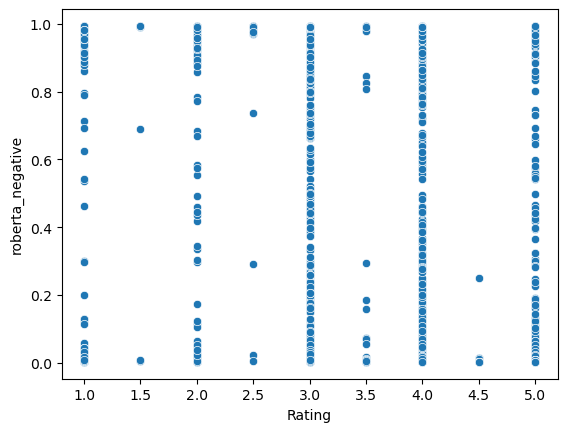

In [42]:
sns.scatterplot(reviews_copy, y='roberta_negative', x='Rating')

#### 5.4.2. DistilBERT

In [4]:
from transformers import DistilBertTokenizer,  DistilBertForSequenceClassification  
import torch
from tqdm.auto import tqdm

tqdm.pandas()

tokenizer = DistilBertTokenizer.from_pretrained('austinmw/distilbert-base-uncased-finetuned-tweets-sentiment')
model = DistilBertForSequenceClassification.from_pretrained('austinmw/distilbert-base-uncased-finetuned-tweets-sentiment')

def scores_distilBERT(text):
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded_input)
    logits = output.logits
    predictions = torch.softmax(logits, dim=-1)[0].detach().numpy()
    return predictions 

reviews_copy[['DistilBert_negative', 'DistilBert_neutral', 'DistilBert_positive']] = (
    reviews_copy['raw_review']
    .progress_apply(scores_distilBERT) 
    .apply(pd.Series)  

)

  0%|          | 0/9954 [00:00<?, ?it/s]

In [6]:
reviews_copy["DistilBert_negative"].describe()

count    9954.000000
mean        0.276660
std         0.368754
min         0.003654
25%         0.013595
50%         0.038643
75%         0.592050
max         0.979445
Name: DistilBert_negative, dtype: float64

In [5]:
reviews_copy["DistilBert_neutral"].describe()

count    9954.000000
mean        0.116316
std         0.142857
min         0.007651
25%         0.027245
50%         0.057852
75%         0.150654
max         0.912799
Name: DistilBert_neutral, dtype: float64

In [4]:
reviews_copy["DistilBert_positive"].describe()

count    9954.000000
mean        0.607024
std         0.400059
min         0.003034
25%         0.101488
50%         0.854088
75%         0.953413
max         0.986990
Name: DistilBert_positive, dtype: float64

After analysing the statistics for the three scores, we conclude that DistilBERT model is also very good predicting positive sentiment scores, with a median of 0.854, followed by neutral scores, with a median of 0.057, and lastly negative scores, with a median of 0.038.

Checking pearson correlation between the ratings and DistilBert's scores.

In [4]:
pearson_r, p_value = pearsonr(reviews_copy["DistilBert_negative"],reviews_copy["Rating"])
pearson_r

-0.8449706267365624

In [5]:
pearson_r, p_value = pearsonr(reviews_copy["DistilBert_neutral"],reviews_copy["Rating"])
pearson_r

-0.14630404516541728

In [6]:
pearson_r, p_value = pearsonr(reviews_copy["DistilBert_positive"],reviews_copy["Rating"])
pearson_r

0.8310948095257575

The values of the pearson correlation between the rating and each DistilBERT score are in agreement to what was said before.

Checking spearman correlation between the ratings and DistilBert's scores.

In [7]:
spearman_r, p_value = spearmanr(reviews_copy["DistilBert_negative"],reviews_copy["Rating"])
spearman_r

-0.783958608059526

In [8]:
spearman_r, p_value = spearmanr(reviews_copy["DistilBert_neutral"],reviews_copy["Rating"])
spearman_r

-0.31559451957476137

In [9]:
spearman_r, p_value = spearmanr(reviews_copy["DistilBert_positive"],reviews_copy["Rating"])
spearman_r

0.7779273957307342

This values are also in accordance to what was previously mentioned, strengthening that there is a positive relationship between positive sentiment scores and ratings.

<Axes: xlabel='Rating', ylabel='DistilBert_negative'>

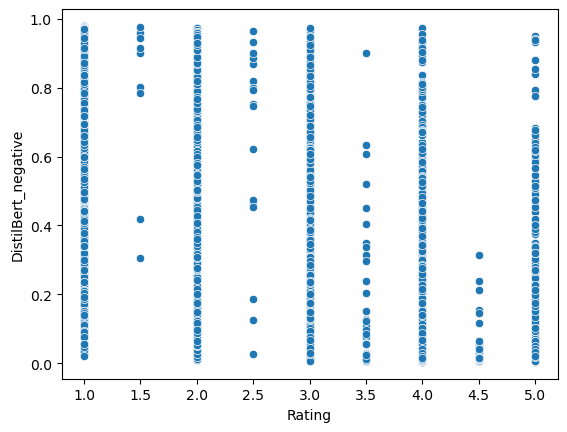

In [10]:
sns.scatterplot(reviews_copy, y='DistilBert_negative', x='Rating')

<Axes: xlabel='Rating', ylabel='DistilBert_neutral'>

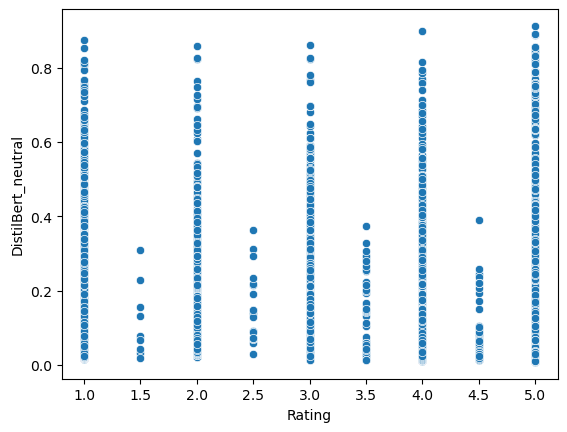

In [11]:
sns.scatterplot(reviews_copy, y='DistilBert_neutral', x='Rating')

<Axes: xlabel='Rating', ylabel='DistilBert_positive'>

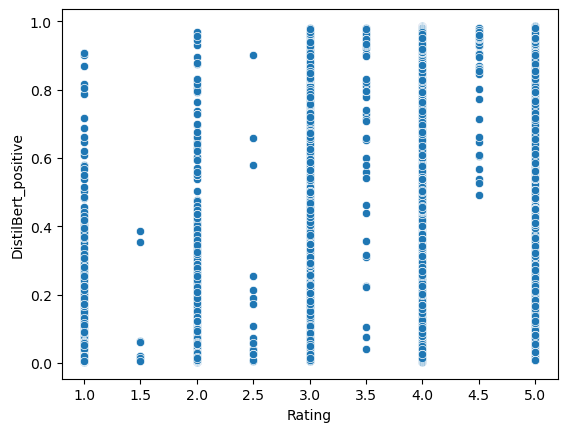

In [12]:
sns.scatterplot(reviews_copy, y='DistilBert_positive', x='Rating')

From these plots, we can conclude that higher ratings have a higher score and lower ratings have a lower score, although there are some outliers. The more neutral ratings, show a bigger spread.

### 5.4.3. Comparing DistilBERT with RoBERTa

To compare both pre trained models, we generated a scatter plot and checked their pearson and spearman correlation.

<Axes: xlabel='DistilBert_positive', ylabel='roberta_positive'>

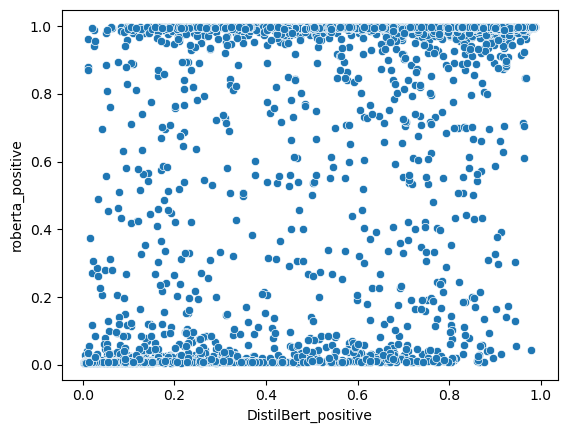

In [17]:
sns.scatterplot(reviews_copy, y='roberta_positive', x='DistilBert_positive')

This scatter plot shows no clear relationship between DistilBERT and RoBERTa's positive scores, which may mean that the models may understand the positive sentiment and different ways.

In [21]:
spearman_r, p_value = spearmanr(reviews_copy["DistilBert_positive"],reviews_copy["roberta_positive"])
spearman_r

0.8521736005827335

In [23]:
pearson_r, p_value = pearsonr(reviews_copy["DistilBert_positive"],reviews_copy["roberta_positive"])
pearson_r

0.894479450238494

When analysing the pearson and spearman correlation between the same variables we got the values, 0.89 and 0.85, accordingly. These values do not support what was show in the plot and indicate a very strong relationship between the two.

In [24]:
reviews_copy.head()

,Unnamed: 0.1,Unnamed: 0,Restaurant,raw_review,Rating,review_len,sents,nr_sents,preproc_review,preproc_review_no_sw,preproc_review_vader,vader_scores,preproc_review_textblob,textblob_scores,roberta_negative,roberta_positive,DistilBert_negative,DistilBert_neutral,DistilBert_positive
0,0,0,Beyond Flavours,"The ambience was good, food was quite good . had Saturday lunch , which was ...",5.0,224,"['The ambience was good, food was quite good .', 'had Saturday lunch , which...",5,the ambience wa good food wa quite good had saturday lunch which wa cost eff...,ambience good food quite good saturday lunch cost effective good place sate ...,"The ambience was good, food was quite good . had Saturday lunch, which was c...",0.9664,"The ambience was good, food was quite good . had Saturday lunch, which was c...",0.660000,0.002356,0.997644,0.018803,0.049048,0.932149
1,1,1,Beyond Flavours,Ambience is too good for a pleasant evening. Service is very prompt. Food is...,5.0,144,"['Ambience is too good for a pleasant evening.', 'Service is very prompt.', ...",5,ambience is too good for a pleasant evening service is very prompt food is g...,ambience good pleasant evening service prompt food good good experience soum...,Ambience is too good for a pleasant evening . Service is very prompt . Food ...,0.9360,Ambience is too good for a pleasant evening . Service is very prompt . Food ...,0.606667,0.002155,0.997845,0.025681,0.065818,0.908501
2,2,2,Beyond Flavours,A must try.. great food great ambience. Thnx for the service by Pradeep and ...,5.0,189,"['A must try.. great food great ambience.', 'Thnx for the service by Pradeep...",3,a must try great food great ambience thnx for the service by pradeep and sub...,must try great food great ambience thnx service pradeep subroto personal rec...,A must try .. great food great ambience . Thnx for the service by Pradeep an...,0.9186,A must try .. great food great ambience . Thnx for the service by Pradeep an...,0.540000,0.002181,0.997819,0.009632,0.019108,0.971260
3,3,3,Beyond Flavours,Soumen das and Arun was a great guy. Only because of their behavior and sinc...,5.0,148,"['Soumen das and Arun was a great guy.', 'Only because of their behavior and...",2,soumen da and arun wa a great guy only because of their behavior and sincere...,soumen da arun great guy behavior sincerety good food course would like visi...,Soumen das and Arun was a great guy . Only because of their behavior and sin...,0.8591,Soumen das and Arun was a great guy . Only because of their behavior and sin...,0.500000,0.002371,0.997629,0.025878,0.048702,0.925420
4,4,4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are g...,5.0,160,"['Food is good.we ordered Kodi drumsticks and basket mutton biryani.', 'All ...",6,food is ordered kodi drumstick and basket mutton biryani all are good thanks...,food ordered kodi drumstick basket mutton biryani good thanks pradeep served...,Food is ordered Kodi drumsticks and basket mutton biryani . All are good . T...,0.9201,Food is ordered Kodi drumsticks and basket mutton biryani . All are good . T...,0.577500,0.002082,0.997918,0.012526,0.024364,0.963110


## 6. Analysing Outliers

[Back to TOC](#toc)

When we were reviewing the models' results, we observed that sometimes low ratings had a very positive scores or vice versa, so in this section we will conduct a deeper analysis and try to understand why this happens.

### 6.1. Low Scores, High Rating

#### 6.1.1. WordClouds

In [58]:
reviews_outliers_low = reviews_copy[
    (
        (reviews_copy["vader_scores"] <= 0.5) &
        (reviews_copy["textblob_scores"] <= 0.5) &
        (reviews_copy["roberta_positive"] <= 0.5) &
        (reviews_copy["DistilBert_positive"] <= 0.5)
    ) &
    (reviews_copy["Rating"] >= 4)]

In [59]:
preprocessor = pipeline_v2.MainPipeline( no_punctuation=False, ignored_stopwords=['no', 'not'])
reviews_outliers_low['preproc_review_points_sw'] = reviews_outliers_low['raw_review'].map(lambda content : preprocessor.main_pipeline(content))

C:\Users\seni2\AppData\Local\Temp\ipykernel_30356\1949388977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_outliers_low['preproc_review_points_sw'] = reviews_outliers_low['raw_review'].map(lambda content : preprocessor.main_pipeline(content))


In [60]:
unigram_bow_vectorizer = CountVectorizer(ngram_range=(2,2), token_pattern=r"(?u)\b\w+\b")
wc = WordCloud(background_color="white",max_words=100, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))

# Create the unigram
reviews_copy_vectorizer_matrix = unigram_bow_vectorizer.fit_transform(reviews_outliers_low["preproc_review_points_sw"]).toarray()

reviews_outliers_low["initial_bow_vector"] = reviews_copy_vectorizer_matrix.tolist()

C:\Users\seni2\AppData\Local\Temp\ipykernel_30356\597562531.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_outliers_low["initial_bow_vector"] = reviews_copy_vectorizer_matrix.tolist()


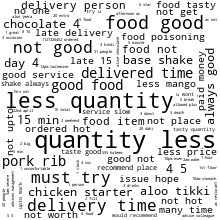

In [61]:
reviews_copy_list = unigram_bow_vectorizer.get_feature_names_out()

# Sum count of each unigram
word_count = np.sum(reviews_copy_vectorizer_matrix, axis=0).tolist()
reviews_dict = dict(zip(reviews_copy_list, word_count))

# Generating the world cloud
wc.generate_from_frequencies(reviews_dict)
wc.to_image()

From this wordcloud, it is possible to identify some negative expreessions, such as : 'less quantity', 'delivery time', 'many time' and '15 min', 'not good'. With these expressions we can idenfity some customers complaints like the quantity of food received was not the one expected and the waiting time being too long, being this last one the most proeminent one.

#### 6.1.2. Most frequent words

In [62]:
bigram_bow_vectorizer = CountVectorizer(ngram_range=(2,2), token_pattern=r"(?u)\b\w+\b")

# Create the bigram
reviews_copy_ns_vectorizer_matrix = bigram_bow_vectorizer.fit_transform(reviews_outliers_low["preproc_review_points_sw"]).toarray()
reviews_ns_copy_list = bigram_bow_vectorizer.get_feature_names_out()

# sum count of each bigram
word_count_ns = np.sum(reviews_copy_ns_vectorizer_matrix, axis=0).tolist()
reviews_dict_ns = dict(zip(reviews_ns_copy_list, word_count_ns))

sorted_dict_ns = dict(sorted(reviews_dict_ns.items(), key=lambda item: item[1], reverse=True))
top_words_ns = dict(list(sorted_dict_ns.items())[:30])

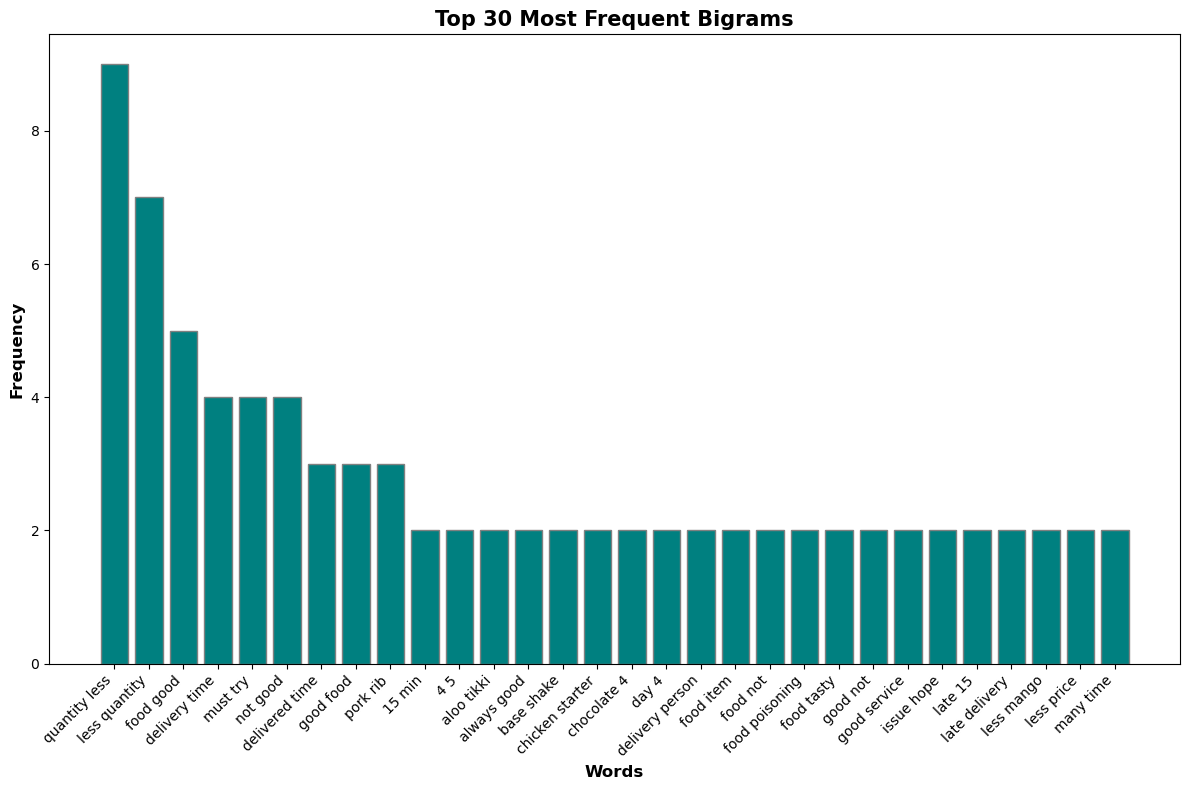

In [63]:
plt.figure(figsize=(12, 8))
bars = plt.bar(top_words_ns.keys(), top_words_ns.values(), color='teal', edgecolor='gray')

# Adding style elements
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Frequent Bigrams', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

The conclusions that we can take from this expression count are in accordance to what was mentioned about the wordcloud, the customers are dissatisfied with some aspects of the restaurants, mainly the food quantity, the waiting time and in this graph we can also state that customers complaint about the price, the delivery person and getting sick after eating in the restaurant ('food poisoning').

#### 6.1.3. Checking invalid words

In [64]:
valid_words = set(brown.words(categories=['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies',
'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance',
'science_fiction']))

webtext_words = set(word.lower() for fileid in webtext.fileids() for word in webtext.words(fileid))

# Add the webtext words our set
valid_words.update(webtext_words)

def findings_not_words(text):

    pattern = r'\b[a-zA-Z]+\b'

    matches = re.findall(pattern, text)

    invalid_words = [word for word in matches if word.lower() not in valid_words]
    return invalid_words

reviews_outliers_low["invalid_words"] = reviews_outliers_low["preproc_review_points_sw"].apply(findings_not_words)

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\seni2\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\seni2\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
C:\Users\seni2\AppData\Local\Temp\ipykernel_30356\3852655763.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_outliers_low["invalid_words"] = reviews_outliers_low["preproc_review_points_sw"].apply(findings_not_words)


In [65]:
reviews_outliers_invalid = reviews_outliers_low[reviews_outliers_low['invalid_words'].str.len() !=0]
reviews_outliers_invalid["invalid_words"] = reviews_outliers_invalid["invalid_words"].apply(lambda x: ' '.join(x))
reviews_outliers_invalid

C:\Users\seni2\AppData\Local\Temp\ipykernel_30356\2189092946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_outliers_invalid["invalid_words"] = reviews_outliers_invalid["invalid_words"].apply(lambda x: ' '.join(x))


,Unnamed: 0.1,Unnamed: 0,Restaurant,raw_review,Rating,review_len,sents,nr_sents,preproc_review,initial_bow_vector,...,preproc_review_textblob,textblob_scores,mean_polarity,roberta_negative,roberta_positive,DistilBert_negative,DistilBert_neutral,DistilBert_positive,preproc_review_points_sw,invalid_words
306,306,306,Shah Ghouse Hotel & Restaurant,Used to hear that this was probably the best place to have haleem in the cit...,5.0,633,['Used to hear that this was probably the best place to have haleem in the c...,9,used to hear that this wa probably the best place to have haleem in the city...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",...,Used to hear that this was probably the best place to have haleem in the cit...,0.240833,-0.332683,0.992089,0.007911,0.879517,0.098120,0.022363,used hear probably best place haleem city . dismay ordered renowned haleem l...,haleem haleem tastewise haleem tastier
349,349,349,Shah Ghouse Hotel & Restaurant,No onions for any biriyani full fake delivery. Don't order and believe them ...,4.0,140,"['No onions for any biriyani full fake delivery.', ""Don't order and believe ...",2,no onion for any biriyani full fake delivery dont order and believe them the...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,No onions for any biriyani full fake delivery . Do not order and believe the...,-0.135000,-0.430950,0.992643,0.007357,0.952902,0.042769,0.004329,no onion biriyani full fake delivery . not order believe delivering false bi...,biriyani biryani
370,370,370,Shah Ghouse Hotel & Restaurant,It is completely biryani house.. You will not ❌ get satisfied every time. Bu...,4.0,255,['It is completely biryani house.. You will not ❌ get satisfied every time.'...,5,it is completely biryani house you will not get satisfied every time but u c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,It is completely biryani house .. You will not get satisfied every time . Bu...,0.145833,-0.216933,0.990377,0.009623,0.837618,0.126743,0.035639,completely biryani house .. not get satisfied every time . u ca not find typ...,biryani biryani hyderabad ambience
606,606,606,eat.fit,Order no - 1127326452\r\n\r\nOrdered rajma rice and what I received cold and...,4.0,172,['Order no - 1127326452\r\n\r\nOrdered rajma rice and what I received cold a...,3,order no - 1127326452 ordered rajma rice and what i received cold and badly ...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,Order no - 1127326452 Ordered rajma rice and what I received cold and badly ...,-0.683333,-0.788617,0.992256,0.007744,0.972797,0.022934,0.004269,order no - 1127326452 ordered rajma rice received cold badly smelly rotten f...,rajma zomato
763,763,763,Shah Ghouse Spl Shawarma,if u look at the they make it u wont even try it. but once u try it u wont f...,4.0,193,"['if u look at the they make it u wont even try it.', 'but once u try it u w...",5,if u look at the they make it u wont even try it but once u try it u wont fo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,if u look at the they make it u wont even try it . but once u try it u wont ...,-0.008333,-0.068317,0.915244,0.084756,0.682696,0.219614,0.097690,u look make u wont even try . u try u wont forget . aswum . place dirty lack...,aswum cleanliness gud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8924,8924,8924,Mohammedia Shawarma,hhjkfhjjj,5.0,9,['hhjkfhjjj'],1,hhjkfhjjj,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,hhjkfhjjj,0.000000,0.000000,0.967254,0.032746,0.087352,0.831942,0.080706,hhjkfhjjj,hhjkfhjjj
9431,9431,9431,Dunkin' Donuts,Had a box of 3 donuts post lunch at sln terminus ..would rate the donuts ind...,4.0,163,['Had a box of 3 donuts post lunch at sln terminus ..would rate the donuts i...,1,had a box of 3 donut post lunch 

In [66]:
unigram_bow_vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r"(?u)\b\w+\b")
wc = WordCloud(background_color="white",max_words=100, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))

# Create the unigram
reviews_copy_vectorizer_matrix = unigram_bow_vectorizer.fit_transform(reviews_outliers_invalid["invalid_words"]).toarray()

reviews_outliers_invalid["initial_bow_vector"] = reviews_copy_vectorizer_matrix.tolist()

C:\Users\seni2\AppData\Local\Temp\ipykernel_30356\565789037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_outliers_invalid["initial_bow_vector"] = reviews_copy_vectorizer_matrix.tolist()


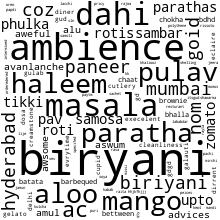

In [67]:
reviews_copy_list = unigram_bow_vectorizer.get_feature_names_out()

# Sum count of each uigram
word_count = np.sum(reviews_copy_vectorizer_matrix, axis=0).tolist()
reviews_dict = dict(zip(reviews_copy_list, word_count))

# Generating the world cloud
wc.generate_from_frequencies(reviews_dict)
wc.to_image()

From this wordcloud, it is possible to see that most of the invalid words are dishes names, so this can mean that something went wrong when preparing these dishes or it may not even have anything to do with the dishes themselves, but another aspect that was mentioned together with the dish. However as they were considered invalid words it can also be by them that our models could not capture well the sentiment of the reviews and therefore the reason why we have a descrapancy between the rating and the sentiment scores.

In [68]:
bigram_bow_vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r"(?u)\b\w+\b")

# Create the bigram
reviews_copy_ns_vectorizer_matrix = bigram_bow_vectorizer.fit_transform(reviews_outliers_invalid["invalid_words"]).toarray()
reviews_ns_copy_list = bigram_bow_vectorizer.get_feature_names_out()

# Sum count of each bigram
word_count_ns = np.sum(reviews_copy_ns_vectorizer_matrix, axis=0).tolist()
reviews_dict_ns = dict(zip(reviews_ns_copy_list, word_count_ns))

sorted_dict_ns = dict(sorted(reviews_dict_ns.items(), key=lambda item: item[1], reverse=True))
top_words_ns = dict(list(sorted_dict_ns.items())[:30])

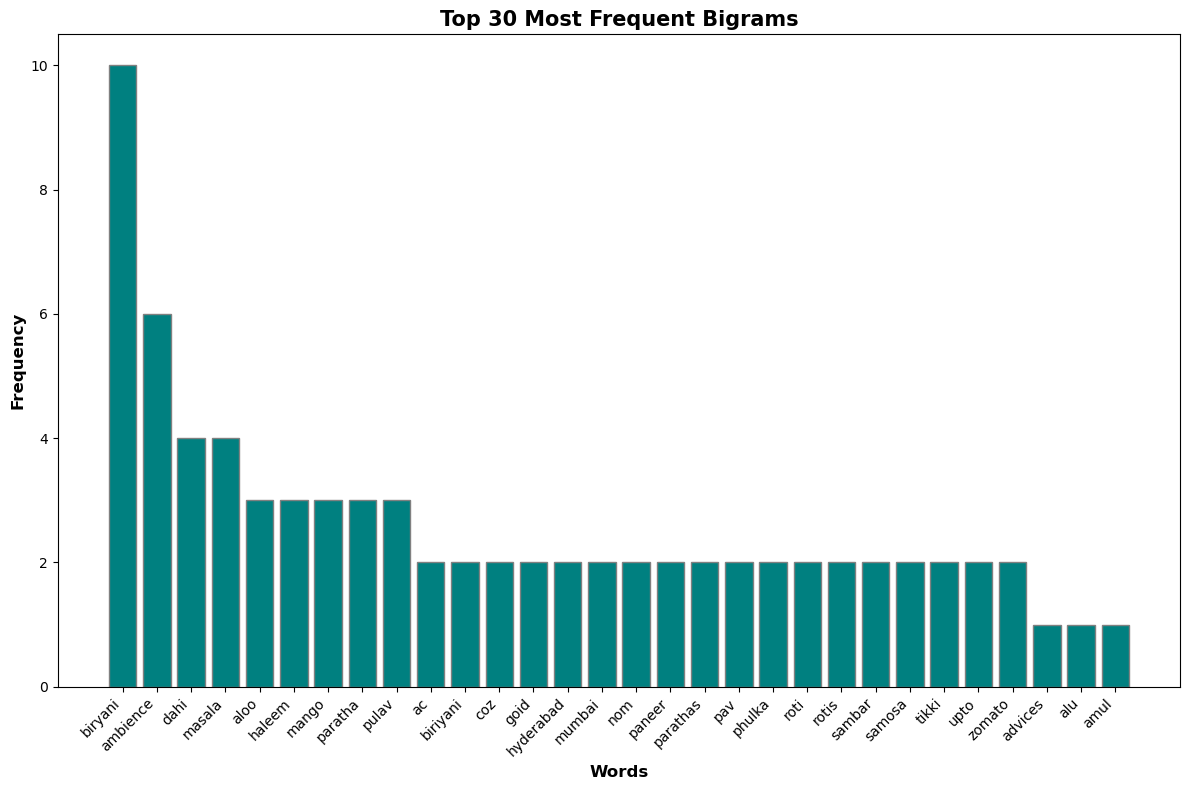

In [69]:
plt.figure(figsize=(12, 8))
bars = plt.bar(top_words_ns.keys(), top_words_ns.values(), color='teal', edgecolor='gray')

# Adding style elements
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Frequent Bigrams', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

The conclusions that we can take from this word count are in accordance to what was mentioned about the wordcloud. The most frequent words are names of dishes and 'ambience', which may some concerns of the customers with the restaurant's environment.

#### Conclusion

After analysing reviews with a high rating but a low sentiment score, it is possible to conclude that customers that wrote these reviews are  overall satisfied with their exprience in the restaurant but some things failed for them, like the restaurant's ambiance or the waiting time or the quantity of food, and the models are giving more importance to these small flaws than to the positive part of the reviews. Or even because some reviews where not valid and our models could not capture the true sentiment. It can also be one of these two scenarios: customers that give high ratings out of habit even to negative/neutral reviews or customers that made a mistake when choosing the rating.

### 6.2. High Scores, Low Rating

#### 6.2.1. Wordclouds

In [70]:
reviews_outliers_high = reviews_copy[
    (
        (reviews_copy["vader_scores"] >= 0.6) &
        (reviews_copy["textblob_scores"] >= 0.6) &
        (reviews_copy["roberta_positive"] >= 0.6) &
        (reviews_copy["DistilBert_positive"] >= 0.6)
    ) &
    (reviews_copy["Rating"] <= 3)]

In [71]:
reviews_outliers_high

,Unnamed: 0.1,Unnamed: 0,Restaurant,raw_review,Rating,review_len,sents,nr_sents,preproc_review,initial_bow_vector,...,preproc_review_vader,vader_scores,preproc_review_textblob,textblob_scores,mean_polarity,roberta_negative,roberta_positive,DistilBert_negative,DistilBert_neutral,DistilBert_positive
1397,1397,1397,The Lal Street - Bar Exchange,"Great place, awesome music and great ambiance but waiters are unfriendly. Th...",3.0,145,"['Great place, awesome music and great ambiance but waiters are unfriendly.'...",2,great place awesome music and great ambiance but waiter are unfriendly thoug...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"Great place, awesome music and great ambiance but waiters are unfriendly . T...",0.9428,"Great place, awesome music and great ambiance but waiters are unfriendly . T...",0.720000,0.831400,0.007817,0.992183,0.016728,0.024138,0.959135
2435,2435,2435,SKYHY,Nice place with an awesome ambience.\r\nDelicious food and customizations ar...,3.0,184,"['Nice place with an awesome ambience.', 'Delicious food and customizations ...",3,nice place with an awesome ambience delicious food and customizations are co...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,Nice place with an awesome ambience . Delicious food and customizations are ...,0.9287,Nice place with an awesome ambience . Delicious food and customizations are ...,0.866667,0.897683,0.153399,0.846601,0.010568,0.022082,0.967350
2451,2451,2451,SKYHY,The best hangouts place with friends and girlfriend and it had good dance fl...,3.0,240,['The best hangouts place with friends and girlfriend and it had good dance ...,2,the best hangout place with friend and girlfriend and it had good dance floo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,The best hangouts place with friends and girlfriend and it had good dance fl...,0.7615,The best hangouts place with friends and girlfriend and it had good dance fl...,0.641667,0.701583,0.002464,0.997536,0.025775,0.066044,0.908181
2463,2463,2463,SKYHY,Me and my friends were at this pace for Saturday club night. Dance floor is ...,1.0,170,"['Me and my friends were at this pace for Saturday club night.', 'Dance floo...",2,me and my friend were at this pace for saturday club night dance floor is sp...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,Me and my friends were at this pace for Saturday club night . Dance floor is...,0.7650,Me and my friends were at this pace for Saturday club night . Dance floor is...,0.700000,0.732500,0.002777,0.997223,0.022653,0.074068,0.903279
2644,2644,2644,Mustang Terrace Lounge,"Food, drinks and music all is good. What this place lacks is in service. The...",3.0,281,"['Food, drinks and music all is good.', 'What this place lacks is in service...",6,food drink and music all is good what this place lack is in service the serv...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"Food, drinks and music all is good . What this place lacks is in service . T...",0.9022,"Food, drinks and music all is good . What this place lacks is in service . T...",0.625000,0.763600,0.010920,0.989080,0.057693,0.078212,0.864095
3507,3507,3507,Green Bawarchi Restaurant,Very nice Mandi. All Mandi r best but service for Briyani section is not goo...,3.0,161,"['Very nice Mandi.', 'All Mandi r best but service for Briyani section is no...",4,very nice mandi all mandi r best but service for briyani section is not good...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,Very nice Mandi . All Mandi r best but service for Briyani section is not go...,0.9609,Very nice Mandi . All Mandi r best but service for Briyani section is not go...,0.686000,0.823450,0.225423,0.774577,0.086691,0.105242,0.808067
4110,4110,4110,Karachi Bakery,I love Karachi for its taste. No issues with the food. But I order

In [72]:
preprocessor = pipeline_v2.MainPipeline( no_punctuation=False, ignored_stopwords=['no', 'not'])
reviews_outliers_high['preproc_review_points_sw'] = reviews_outliers_high['raw_review'].map(lambda content : preprocessor.main_pipeline(content))


C:\Users\seni2\AppData\Local\Temp\ipykernel_30356\1315687964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_outliers_high['preproc_review_points_sw'] = reviews_outliers_high['raw_review'].map(lambda content : preprocessor.main_pipeline(content))


In [73]:
unigram_bow_vectorizer = CountVectorizer(ngram_range=(2,2), token_pattern=r"(?u)\b\w+\b")
wc = WordCloud(background_color="white",max_words=100, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))

# Create the bigram
reviews_copy_vectorizer_matrix = unigram_bow_vectorizer.fit_transform(reviews_outliers_high["preproc_review_points_sw"]).toarray()


reviews_outliers_high["initial_bow_vector"] = reviews_copy_vectorizer_matrix.tolist()

C:\Users\seni2\AppData\Local\Temp\ipykernel_30356\1211822790.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_outliers_high["initial_bow_vector"] = reviews_copy_vectorizer_matrix.tolist()


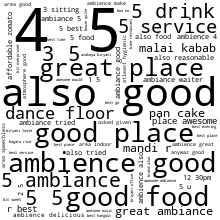

In [74]:
reviews_copy_list = unigram_bow_vectorizer.get_feature_names_out()


# sum count of each bigram
word_count = np.sum(reviews_copy_vectorizer_matrix, axis=0).tolist()
reviews_dict = dict(zip(reviews_copy_list, word_count))


#generating the world cloud

wc.generate_from_frequencies(reviews_dict)
wc.to_image()

From this wordcloud, it is possible to identify many positive expreessions, such as : 'also good', 'great place', 'ambiance good' and 'good food'. With these expressions we can idenfity some customers are very satisfied with the restaurants environment and their food. We can also see numbers, '5', '4', '3', being '5' the more frequent one. Some customers are giving ratings to diverse elements in the restaurant in their reviews ('5 drink', '5 service', '5 ambiance') and with '5' being the more frequent one, we can state that the customers are very satisfied.

#### 6.2.2. Most Frequent Words

In [75]:
bigram_bow_vectorizer = CountVectorizer(ngram_range=(2,2), token_pattern=r"(?u)\b\w+\b")

# Create the unigram
reviews_copy_ns_vectorizer_matrix = bigram_bow_vectorizer.fit_transform(reviews_outliers_high["preproc_review_points_sw"]).toarray()
reviews_ns_copy_list = bigram_bow_vectorizer.get_feature_names_out()

# sum count of each unigram
word_count_ns = np.sum(reviews_copy_ns_vectorizer_matrix, axis=0).tolist()
reviews_dict_ns = dict(zip(reviews_ns_copy_list, word_count_ns))

sorted_dict_ns = dict(sorted(reviews_dict_ns.items(), key=lambda item: item[1], reverse=True))
top_words_ns = dict(list(sorted_dict_ns.items())[:30])

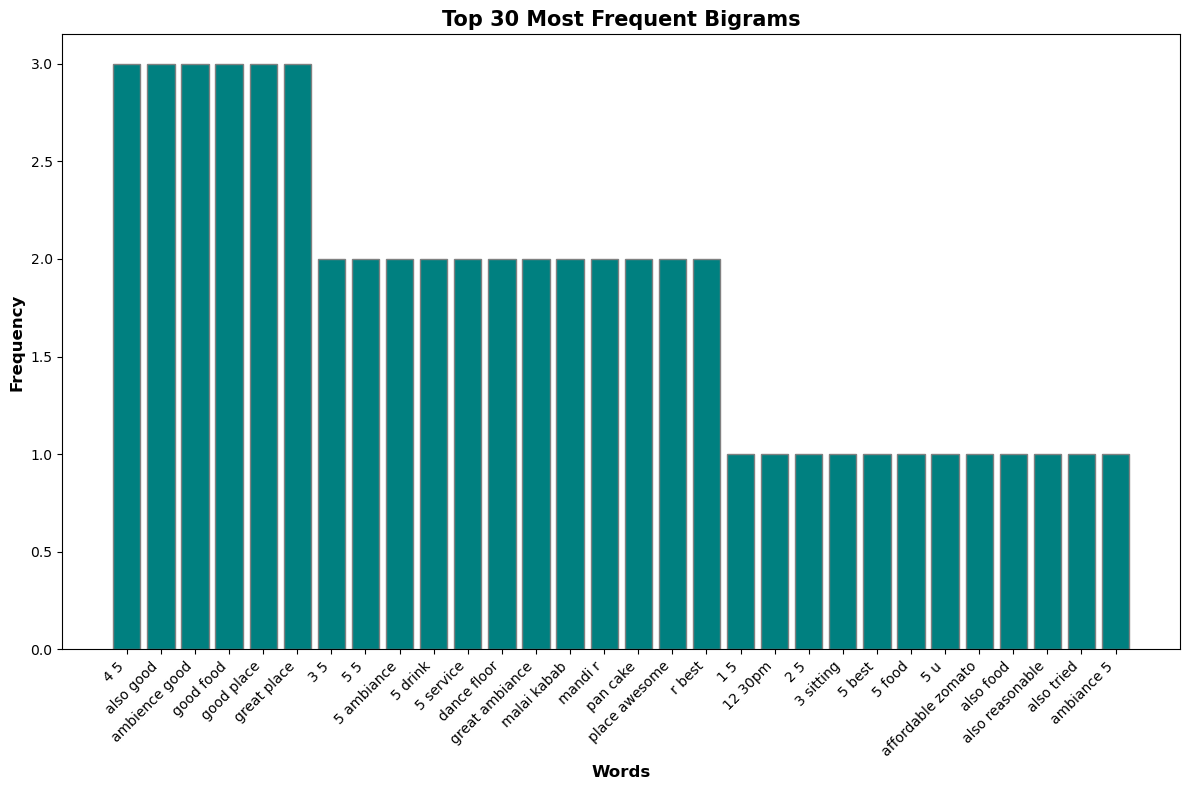

In [76]:
plt.figure(figsize=(12, 8))
bars = plt.bar(top_words_ns.keys(), top_words_ns.values(), color='teal', edgecolor='gray')

# Adding style elements
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Frequent Bigrams', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

The conclusions that we can take from this expression count are in accordance to what was mentioned about the wordcloud, the customers are very satisfied with the restaurant's environment and their food and that the customers are giving very good ratings to various aspects in the restaurants.

#### 6.2.3. Checking invalid words

In [77]:
valid_words = set(brown.words(categories=['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies',
'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance',
'science_fiction']))

webtext_words = set(word.lower() for fileid in webtext.fileids() for word in webtext.words(fileid))

# Add the webtext words to your existing set
valid_words.update(webtext_words)


def findings_not_words(text):

    pattern = r'\b[a-zA-Z]+\b'

    matches = re.findall(pattern, text)

    invalid_words = [word for word in matches if word.lower() not in valid_words]
    return invalid_words


reviews_outliers_high["invalid_words"] = reviews_outliers_high["preproc_review_points_sw"].apply(findings_not_words)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\seni2\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\seni2\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
C:\Users\seni2\AppData\Local\Temp\ipykernel_30356\2186370859.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_outliers_high["invalid_words"] = reviews_outliers_high["preproc_review_points_sw"].apply(findings_not_words)


In [78]:
reviews_outliers_invalid_high = reviews_outliers_high[reviews_outliers_high['invalid_words'].str.len() !=0]
reviews_outliers_invalid_high["invalid_words"] = reviews_outliers_invalid_high["invalid_words"].apply(lambda x: ' '.join(x))


C:\Users\seni2\AppData\Local\Temp\ipykernel_30356\836270415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_outliers_invalid_high["invalid_words"] = reviews_outliers_invalid_high["invalid_words"].apply(lambda x: ' '.join(x))


In [79]:
reviews_outliers_invalid_high

,Unnamed: 0.1,Unnamed: 0,Restaurant,raw_review,Rating,review_len,sents,nr_sents,preproc_review,initial_bow_vector,...,preproc_review_textblob,textblob_scores,mean_polarity,roberta_negative,roberta_positive,DistilBert_negative,DistilBert_neutral,DistilBert_positive,preproc_review_points_sw,invalid_words
2435,2435,2435,SKYHY,Nice place with an awesome ambience.\r\nDelicious food and customizations ar...,3.0,184,"['Nice place with an awesome ambience.', 'Delicious food and customizations ...",3,nice place with an awesome ambience delicious food and customizations are co...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",...,Nice place with an awesome ambience . Delicious food and customizations are ...,0.866667,0.897683,0.153399,0.846601,0.010568,0.022082,0.967350,nice place awesome ambience . delicious food customizations considered . ser...,ambience customizations
2451,2451,2451,SKYHY,The best hangouts place with friends and girlfriend and it had good dance fl...,3.0,240,['The best hangouts place with friends and girlfriend and it had good dance ...,2,the best hangout place with friend and girlfriend and it had good dance floo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,The best hangouts place with friends and girlfriend and it had good dance fl...,0.641667,0.701583,0.002464,0.997536,0.025775,0.066044,0.908181,best hangout place friend girlfriend good dance floor . got good variety liq...,hangout quire instagram skyhy
2463,2463,2463,SKYHY,Me and my friends were at this pace for Saturday club night. Dance floor is ...,1.0,170,"['Me and my friends were at this pace for Saturday club night.', 'Dance floo...",2,me and my friend were at this pace for saturday club night dance floor is sp...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,Me and my friends were at this pace for Saturday club night . Dance floor is...,0.700000,0.732500,0.002777,0.997223,0.022653,0.074068,0.903279,friend pace saturday club night . dance floor spacious .ambience good .overa...,ambience
2644,2644,2644,Mustang Terrace Lounge,"Food, drinks and music all is good. What this place lacks is in service. The...",3.0,281,"['Food, drinks and music all is good.', 'What this place lacks is in service...",6,food drink and music all is good what this place lack is in service the serv...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"Food, drinks and music all is good . What this place lacks is in service . T...",0.625000,0.763600,0.010920,0.989080,0.057693,0.078212,0.864095,"food, drink music good . place lack service . server literally forgot u call...",ambience
3507,3507,3507,Green Bawarchi Restaurant,Very nice Mandi. All Mandi r best but service for Briyani section is not goo...,3.0,161,"['Very nice Mandi.', 'All Mandi r best but service for Briyani section is no...",4,very nice mandi all mandi r best but service for briyani section is not good...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,Very nice Mandi . All Mandi r best but service for Briyani section is not go...,0.686000,0.823450,0.225423,0.774577,0.086691,0.105242,0.808067,nice mandi . mandi r best service briyani section not good . quantity price ...,mandi mandi briyani mandi mandi
4110,4110,4110,Karachi Bakery,I love Karachi for its taste. No issues with the food. But I ordered a pastr...,2.0,208,"['I love Karachi for its taste.', 'No issues with the food.', 'But I ordered...",6,i love karachi for it taste no issue with the food but i ordered a pastry an...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,I love Karachi for its taste . No issues with the food . But I ordered a pas...,0.750000,0.751550,0.016191,0.983809,0.029091,0.038961,0.931948,love karachi taste . no issue food . ordered pastry asked given parcel . thr...,karachi
4112,4112,4112,Karachi Bakery,The snack it

In [80]:
unigram_bow_vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r"(?u)\b\w+\b")
wc = WordCloud(background_color="white",max_words=100, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))

# Create the bigram

reviews_copy_vectorizer_matrix = unigram_bow_vectorizer.fit_transform(reviews_outliers_invalid_high["invalid_words"]).toarray()


reviews_outliers_invalid_high["initial_bow_vector"] = reviews_copy_vectorizer_matrix.tolist()

C:\Users\seni2\AppData\Local\Temp\ipykernel_30356\2070300170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_outliers_invalid_high["initial_bow_vector"] = reviews_copy_vectorizer_matrix.tolist()


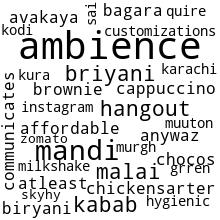

In [81]:
reviews_copy_list = unigram_bow_vectorizer.get_feature_names_out()


# sum count of each bigram
word_count = np.sum(reviews_copy_vectorizer_matrix, axis=0).tolist()
reviews_dict = dict(zip(reviews_copy_list, word_count))


#generating the world cloud

wc.generate_from_frequencies(reviews_dict)
wc.to_image()

From this wordcloud, it is possible to see that most of the invalid words are dishes names, and ambience, so this can mean that customers are very satistfied with the dishes and ambience but may not be satisfied with another element in the restaurant. It is also possible to identify another words like 'hygienic', 'affordable' and 'communicates' which may show satisfaction with the restaurants state of cleanliness, with their prices and with the interaction with the restaurant's staff.

In [82]:
bigram_bow_vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r"(?u)\b\w+\b")

# Create the unigram
reviews_copy_ns_vectorizer_matrix = bigram_bow_vectorizer.fit_transform(reviews_outliers_invalid_high["invalid_words"]).toarray()
reviews_ns_copy_list = bigram_bow_vectorizer.get_feature_names_out()

# sum count of each unigram
word_count_ns = np.sum(reviews_copy_ns_vectorizer_matrix, axis=0).tolist()
reviews_dict_ns = dict(zip(reviews_ns_copy_list, word_count_ns))

sorted_dict_ns = dict(sorted(reviews_dict_ns.items(), key=lambda item: item[1], reverse=True))
top_words_ns = dict(list(sorted_dict_ns.items())[:30])

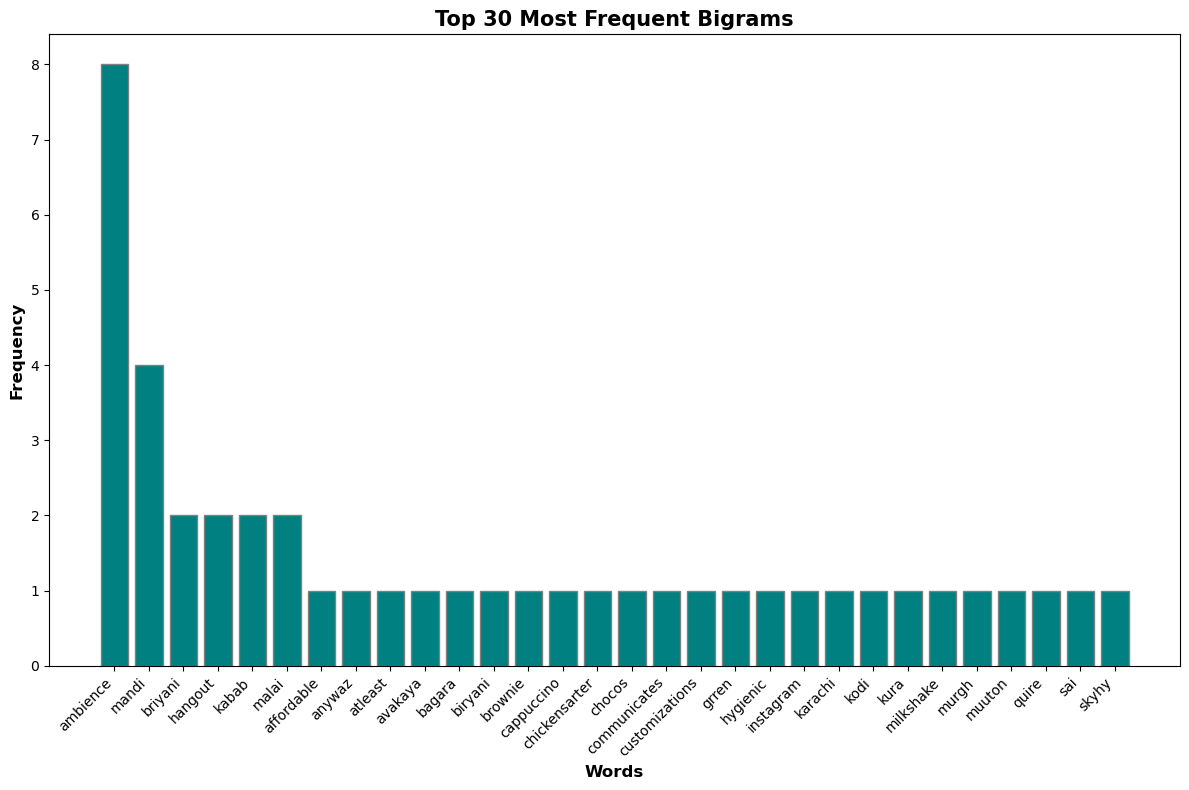

In [83]:
plt.figure(figsize=(12, 8))
bars = plt.bar(top_words_ns.keys(), top_words_ns.values(), color='teal', edgecolor='gray')

# Adding style elements
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Frequent Bigrams', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

The conclusions that we can take from this word count are in accordance to what was mentioned about the wordcloud. The most frequent words are names of dishes, 'ambience', 'affordable' and 'hangout'. The word 'hangout' may suggest that customers enjoy this restaurant to gather with their friends.

### Conclusions

After analysing reviews with a low rating but a high sentiment score, it is possible to conclude that are very satisfied with part of their experience in the restaurants like, the environment and the prices, but may also be dissatisfied with another elements, The models are probably giving more weight to the positive aspects in these reviews rather than to the negative ones. As in the previous case, these reviews may have been mistakenly rated by the customer or they may have been written by customer that give low ratings even to more positive reviews.

## 7. Final Analysis

[Back to TOC](#toc)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'vader_scores'),
  Text(1, 0, 'textblob_scores'),
  Text(2, 0, 'roberta_positive'),
  Text(3, 0, 'DistilBert_positive'),
  Text(4, 0, 'DistilBert_neutral')])

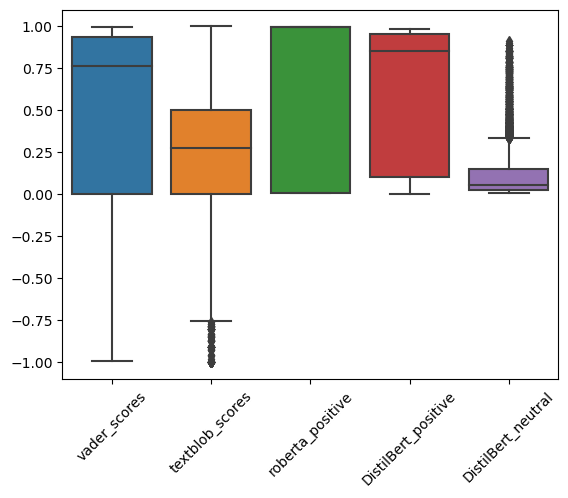

In [5]:
sns.boxplot(data=reviews_copy[['vader_scores', 'textblob_scores', 'roberta_positive', 'DistilBert_positive' , "DistilBert_neutral"]])
plt.xticks(rotation=45)

In Text Blob as we can see low values are assumed as outliers. And in DistilBert high values in the neutral category are also assumed as outliers, which makes sense, but also means that DistilBert assumes that the neutral category is more negative than actually neutral.

<Axes: xlabel='Rating'>

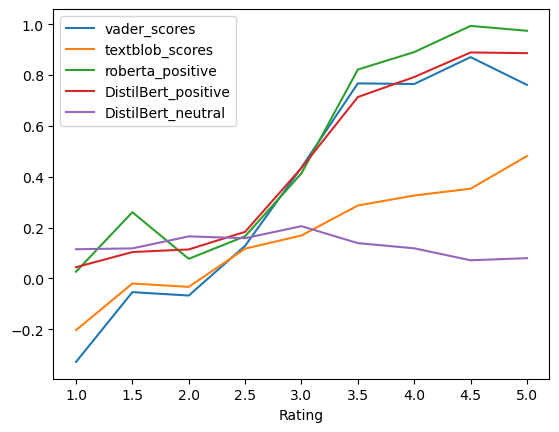

In [6]:
grouped = reviews_copy.groupby('Rating')[['vader_scores', 'textblob_scores', "roberta_positive" , "DistilBert_positive" , "DistilBert_neutral"]].mean()
grouped.plot(kind='line')

In this graph we can see that the only two scores that always increse, as we where expecting, are DistilBert (positive) and TextBlob.

<Axes: >

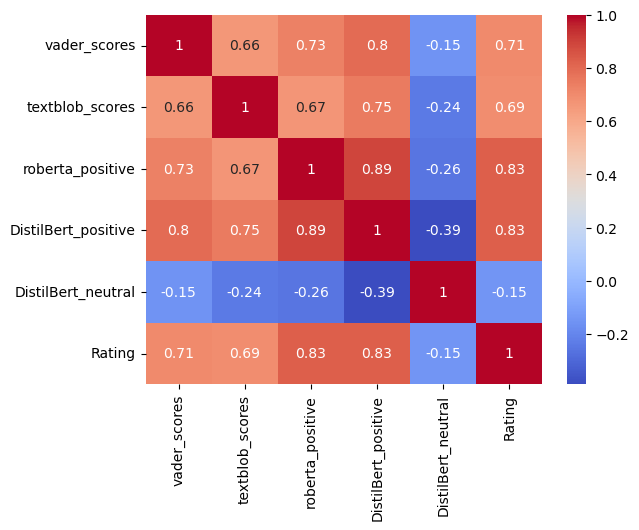

In [7]:
corr = reviews_copy[['vader_scores', 'textblob_scores', 'roberta_positive', 'DistilBert_positive','DistilBert_neutral', 'Rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Here we can confirm that Distilbert neutral is in fact a low negative sentiment score. As Distilbert positive is one of the models that best correlates with the Rating and they always increase with the Rating, we conclude that DistilBert should be the chosen model for the Sentiment Analysis.

### 7.1. Final Model Analysis DistilBert

In [16]:
mean_score = reviews_copy["DistilBert_positive"].median()

In [17]:
mean_score

0.85408848

We can see that according to our chosen model the overall predicted sentiment of the reviews is positive, which is in line of the actual ratings.  We can also inform the Hyderabad Tourism Board that most of the restaurants are secure and good, but there are some serious concerns regarding the hygiene of the restaurants and food poisoning.

## 8. References

[Back to TOC](#toc)




[1] Hugging Face. "cardiffnlp/twitter-roberta-base-sentiment." [Online]. Available: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment.

[2] Hugging Face. "pachequinho/sentiment_roberta_restaurant_10." [Online]. Available: https://huggingface.co/pachequinho/sentiment_roberta_restaurant_10.

[3] Hugging Face. "austinmw/distilbert-base-uncased-finetuned-tweets-sentiment." [Online]. Available: https://huggingface.co/austinmw/distilbert-base-uncased-finetuned-tweets-sentiment. 

[4] Hugging Face. "distilbert/distilbert-base-uncased." [Online]. Available: https://huggingface.co/distilbert/distilbert-base-uncased.

[5] Steven Bird, Ewan Klein, and Edward Loper, Natural Language Processing with Python - Chapter 2: Accessing Text Corpora and Lexical Resources. [Online]. Available: https://www.nltk.org/book/ch02.html.